# Costa Rican Household Poverty Level Prediction

[참고] https://www.kaggle.com/willkoehrsen/a-complete-introduction-and-walkthrough#Costa-Rican-Household-Poverty-Level-Prediction

## Problem and Data Explanation
멀티 클래스 지도학습 문제(This is a supervised multi-class classification machine learning problem):
* Supervised: provided with the labels for the training data
* Multi-class classification: Label은 4개의 class들로 이루어져 있음.(1~4)

### data info
* Target 값은 가난의 정도를 나타냄
    * 1 = extreme poverty 
    * 2 = moderate poverty 
    * 3 = vulnerable households 
    * 4 = non vulnerable households

* 일부 column 설명
* Id: a unique identifier for each individual, this should not be a feature that we use!
* idhogar: a unique identifier for each household. This variable is not a feature, but will be used to group individuals by household as all individuals in a household will have the same identifier.
* parentesco1: indicates if this person is the head of the household.
* Target: the label, which should be equal for all members in a household

### what I learned
* enumerate 함수 :
    * 순서가 있는 자료형(list, set, tuple, dictionary, string)을 입력으로 받아 인덱스 값을 포함하는 enumearte객체를 리턴한다.
* collections.OrderedDict 함수 :
    * 순서대로 저장된 사전형이 필요한 경우 
    * 사전형(dict)는 내부의 자료값만 같으면 동일하다고 판단하지만, 순서를 기억하는 사전형(orderedDict)은 내부의 자료값 뿐만 아니라 입력된 순서까지 같아야 동일한 것으로 판단.
* 함수로 Target이 1,2,3,4 일때 각각의 ked-plot그리는 방법 , 각 Target별 다른 컬러 지정.
* 문자와 숫자가 혼재되어있는 데이터의 경우, 문자를 조건에 따라 특정 숫자로 변경할 때
    * 예를들어, yes:1, no:0으로 바꿀 경우 -> replace({"yes":1, "no":0}) 와 같이 작성 가능
* subplot 에서 각 인자의 의미 :
    * subplot(3,1,1)이면 3행 1열의 1번째 plot
* groupby와 apply함수 동시 사용 : unique한 값이 한개만 있는 Target을 idhogar별로 그룹핑
    * train.groupby('idhogar')['Target'].apply(lambda x: x.nunique() == 1)
* nunique() 와 unique()의 차이 
    * nunique()는 unique한 값의 개수
* 컬럼값을 index로 설정하고 싶을 때
    * model_results.set_index('model', inplace=True)
        * 'model'이라는 컬럼을 index값으로 설정함
    
<br>

* for,if 문 한줄로 함께 사용 & startswith 함수
    * [x for x in data if x.startswith('tipo')] 
    * [x for x in list(plot_data.columns) if x != 'Target']
    * [column for column in upper.columns if any(abs(upper[column]) > 0.5)]
* corr()를 통해 상관계수 구한것에서 위 삼각형 부분 값만 불러오는 법
    * corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
* any()함수 :
    * Iteration이 가능한 객체를 받아 그 항목을 돌면서 어느 하나라도 True이면 결과로 True를 리턴. 
    * all() 함수는 반대로 모두 참이어야 참임.
* iterrows() 함수 : <br>
(참고) : https://3months.tistory.com/419
    * 행에 반복적으로 접근 하면서 그 값을 조작해야 할 경우 사용. 
    * 예를들어, A,B,C,D 컬럼 각각 값이 1일경우 순서대로 0,1,2,3 을 할당하고 싶을 때 
    * 또는, missing value가 0으로 코딩되어 있는데, 이를 nan으로 바꾸고 싶을 때 
* groupby한 값을 동시에 normalize해서 보고 싶을 때
    * heads.groupby('area1')['Target'].value_counts(normalize = True)
* boolean값 (0,1)을 가진 ordinal값에 argmax()로 하나의 컬럼으로 통합 :
    * bad, regular, good라는 세개의 컬럼이 있고 각컬럼 값이 0 또는 1일때 argmax()함수로 bad=0, regular=1, good=2로 매핑가능
* Boolean값을 숫자로 변경
    * True, False로 나오는 Boolean값에 1을 곱하면 숫자로 변환됨. (False=0, True=1)
    
<br>

* 피어슨, 스피어만 상관계수 
* seaborn PairGrid에서 sns.PairGrid하고나서 map_upper, map_diag, map_lower를 따로 지정해줘야 함. 
* aggregation한 feature들의 컬럼을 rename해주는 함수
    * min,max,sum,count,std 들을 '컬럼명'-min, '컬럼명'-max 이런식으로
    * (참고) groupby().agg() 한 결과 컬럼이 두 레벨로 나뉨 -> level[0] , level[1]
    


--------------------------------------------------------------------------------------------------------------------------------------------
### missing value 처리 방법
* missing value가 많은 컬럼 외에 이와 연관이 있을법한 다른 컬럼 하나를 찾아서, null값일 때의 다른 컬럼값과 null값이 아닐때의 다른 컬럼 값을 비교해본다.

In [4]:
# Data manipulation
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Set a few plotting defaults
%matplotlib inline
plt.style.use('fivethirtyeight')
plt.rcParams['font.size'] = 18
plt.rcParams['patch.edgecolor'] = 'k'

In [5]:
pd.options.display.max_columns = 150

# Read in data
train = pd.read_csv('./train.csv')
test = pd.read_csv('./test.csv')
train.head()

,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,r4h2,r4h3,r4m1,r4m2,r4m3,r4t1,r4t2,r4t3,tamhog,tamviv,escolari,rez_esc,hhsize,paredblolad,paredzocalo,paredpreb,pareddes,paredmad,paredzinc,paredfibras,paredother,pisomoscer,pisocemento,pisoother,pisonatur,pisonotiene,pisomadera,techozinc,techoentrepiso,techocane,techootro,cielorazo,abastaguadentro,abastaguafuera,abastaguano,public,planpri,noelec,coopele,sanitario1,sanitario2,sanitario3,sanitario5,sanitario6,energcocinar1,energcocinar2,energcocinar3,energcocinar4,elimbasu1,elimbasu2,elimbasu3,elimbasu4,elimbasu5,elimbasu6,epared1,epared2,epared3,etecho1,etecho2,etecho3,eviv1,eviv2,eviv3,dis,male,female,estadocivil1,estadocivil2,estadocivil3,estadocivil4,estadocivil5,estadocivil6,estadocivil7,parentesco1,parentesco2,parentesco3,parentesco4,parentesco5,parentesco6,parentesco7,parentesco8,parentesco9,parentesco10,parentesco11,parentesco12,idhogar,hogar_nin,hogar_adul,hogar_mayor,hogar_total,dependency,edjefe,edjefa,meaneduc,instlevel1,instlevel2,instlevel3,instlevel4,instlevel5,instlevel6,instlevel7,instlevel8,instlevel9,bedrooms,overcrowding,tipovivi1,tipovivi2,tipovivi3,tipovivi4,tipovivi5,computer,television,mobilephone,qmobilephone,lugar1,lugar2,lugar3,lugar4,lugar5,lugar6,area1,area2,age,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target
0,ID_279628684,190000.0,0,3,0,1,1,0,NaN,0,1,1,0,0,0,0,1,1,1,1,10,NaN,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,21eb7fcc1,0,1,0,1,no,10,no,10.0,0,0,0,1,0,0,0,0,0,1,1.000000,0,0,1,0,0,0,0,1,1,1,0,0,0,0,0,1,0,43,100,1849,1,100,0,1.000000,0.0,100.0,1849,4
1,ID_f29eb3ddd,135000.0,0,4,0,1,1,1,1.0,0,1,1,0,0,0,0,1,1,1,1,12,NaN,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0e5d7a658,0,1,1,1,8,12,no,12.0,0,0,0,0,0,0,0,1,0,1,1.000000,0,0,1,0,0,0,0,1,1,1,0,0,0,0,0,1,0,67,144,4489,1,144,0,1.000000,64.0,144.0,4489,4
2,ID_68de51c94,NaN,0,8,0,1,1,0,NaN,0,0,0,0,1,1,0,1,1,1,1,11,NaN,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,2c7317ea8,0,1,1,1,8,no,11,11.0,0,0,0,0,1,0,0,0,0,2,0.500000,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,92,121,8464,1,0,0,0.250000,64.0,121.0,8464,4
3,ID_d671db89c,180000.0,0,5,0,1,1,1,1.0,0,2,2,1,1,2,1,3,4,4,4,9,1.0,4,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,2b58d945f,2,2,0,4,yes,11,no,11.0,0,0,0,1,0,0,0,0,0,3,1.333333,0,0,1,0,0,0,0,1,3,1,0,0,0,0,0,1,0,17,81,289,16,121,4,1.777778,1.0,121.0,289,4
4,ID_d56d6f5f5,180000.0,0,5,0,1,1,1,1.0,0,2,2,1,1,2,1,3,4,4,4,11,NaN,4,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2b58d945f,2,2,0,4,yes,11,no,11.0,0,0,0,0,1,0,0,0,0,3,1.333333,0,0,1,0,0,0,0,1,3,1,0,0,0,0,0,1,0,37,121,1369,16,121,4,1.777778,1.0,121.0,1369,4


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9557 entries, 0 to 9556
Columns: 143 entries, Id to Target
dtypes: float64(8), int64(130), object(5)
memory usage: 10.4+ MB


In [7]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23856 entries, 0 to 23855
Columns: 142 entries, Id to agesq
dtypes: float64(8), int64(129), object(5)
memory usage: 25.8+ MB


#### integer columns
* 정수값을 가진 컬럼에서 unique한 값 카운팅

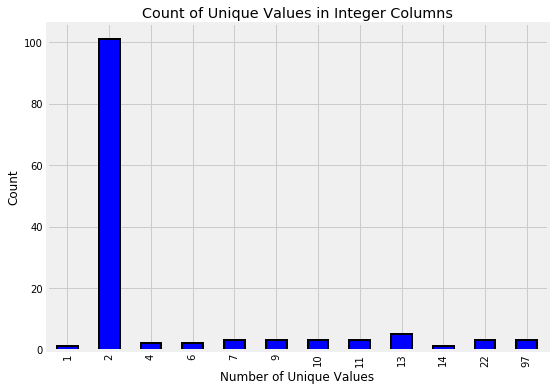

In [8]:
# integer형태인 컬럼의 해당 integer 유니크한 값 카운트 
train.select_dtypes(np.int64).nunique().value_counts().sort_index().plot.bar(color='blue', figsize=(8,6), edgecolor='k', linewidth=2)
plt.xlabel('Number of Unique Values'); plt.ylabel('Count');
plt.title('Count of Unique Values in Integer Columns');
plt.show()

0과 1 값을 갖고 있는 컬럼이 가장 많다. 대다수의 경우, 이러한 boolean정보는 이미 household level안에 속해있다.  <br>
예를들어, 'refrig'컬럼은 가정에 냉장고가 있는지 여부 (0,1)이다.

#### float columns
OrderedDict 함수로 poverty level과 컬러를 매핑 시킬것이다. 왜냐하면, 이것은 key와 value로 가져갈수 있기 때문에. (보통의 python dictionary와는 다름) <br>
가난의 정도에 따라 (1~4) 컬러를 다르게 매핑하여, 가난의 정도 마다 분포에 차이가 있는지를 확인하기 위함.

In [9]:
# enumerate 함수 결과예시
data = enumerate(train.select_dtypes('float'))   # 실수값인 컬럼들
for i, value in data:
    print(i, ":", value)
print()

0 : v2a1
1 : v18q1
2 : rez_esc
3 : meaneduc
4 : overcrowding
5 : SQBovercrowding
6 : SQBdependency
7 : SQBmeaned



===> 여러 컬럼에 대해 한번에 kde-plot을 그리기 위한 함수

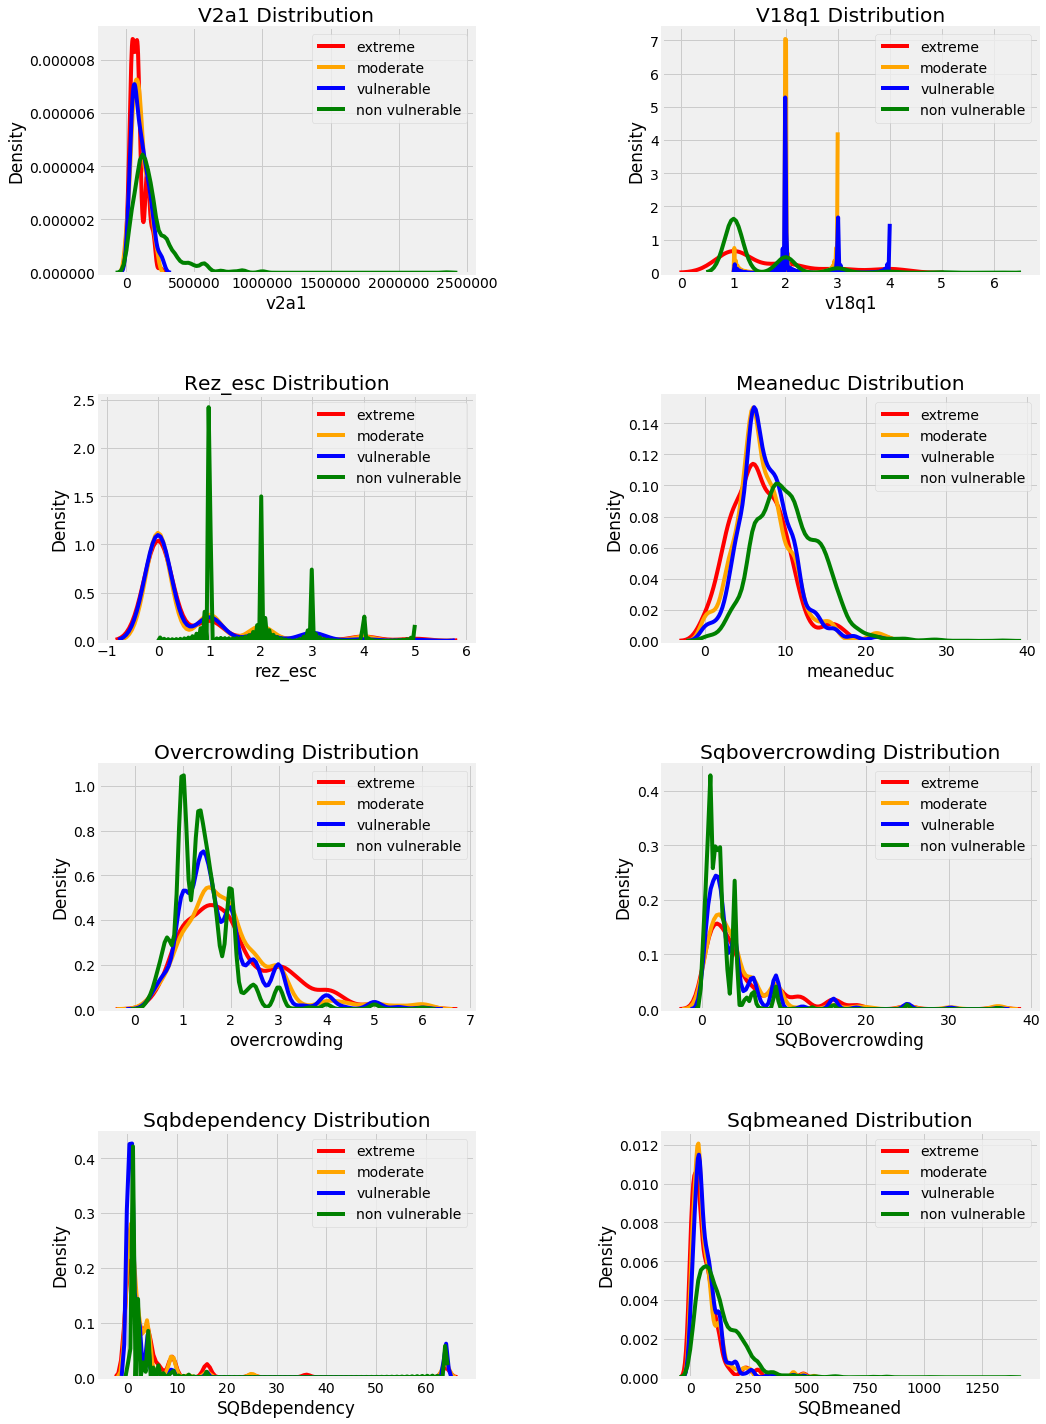

In [10]:
from collections import OrderedDict

plt.figure(figsize = (15, 10))
plt.style.use('fivethirtyeight')

# Color mapping
### OrderedDict는 값을 순서대로 저장.
colors = OrderedDict({1: 'red', 2: 'orange', 3: 'blue', 4: 'green'})
poverty_mapping = OrderedDict({1: 'extreme', 2: 'moderate', 3: 'vulnerable', 4: 'non vulnerable'})

# Iterate through the float columns
### 여기서 i는 0,1,2,3~7 까지의 index값이고 'col'은 float값을 가진 컬럼 값
for i, col in enumerate(train.select_dtypes('float')):
    ax = plt.subplot(4, 2, i + 1)
    
    # Iterate through the poverty levels
    ### poerty_level은 1,2,3,4 값이고 color는 'red','orange'...
    for poverty_level, color in colors.items():
        # Plot each poverty level as a separate line
        sns.kdeplot(train.loc[train['Target'] == poverty_level, col].dropna(), 
                    ax = ax, color = color, label = poverty_mapping[poverty_level])
        
    plt.title(f'{col.capitalize()} Distribution'); plt.xlabel(f'{col}'); plt.ylabel('Density')

plt.subplots_adjust(wspace = 0.5, hspace = 0.5) 
plt.subplots_adjust(top = 2)

추후에 변수와 Target간의 상관관계를 계산할 것이지만, 이 plot에서 이미 어떤 변수들이 가장 연관성이 있는지를 알 수 있다. <br>
'meaneduc'변수의 경우 성인들의 평균 교육은 poverty level과 관련이 있는것을 볼 수 있다 .<br>
성인 평균 교육이 높을 수록, poverty level이 덜 심각한것을 알 수 있음. 즉, 가난할수록 교육이 열악하다

#### Object Columns

In [11]:
# object 형태의 데이터만 
train.select_dtypes('object').head()

,Id,idhogar,dependency,edjefe,edjefa
0,ID_279628684,21eb7fcc1,no,10,no
1,ID_f29eb3ddd,0e5d7a658,8,12,no
2,ID_68de51c94,2c7317ea8,8,no,11
3,ID_d671db89c,2b58d945f,yes,11,no
4,ID_d56d6f5f5,2b58d945f,yes,11,no


Id, idhogar를 제외한 다른 컬럼들은 문자와 숫자 값이 혼재되어 있어 처리가 필요하다. 
* dependency: Dependency rate, calculated = (number of members of the household younger than 19 or older than 64)/(number of member of household between 19 and 64)
* edjefe: years of education of male head of household, based on the interaction of escolari (years of education), head of household and gender, yes=1 and no=0
* edjefa: years of education of female head of household, based on the interaction of escolari (years of education), head of household and gender, yes=1 and no=0 <br>

위 세개 변수의 경우, yes=1, no=0 이므로 string값을 숫자로 바꿀 수 있음.

In [12]:
mapping = {"yes":1, "no":0}

for df in [train,test]:
    df['dependency'] = df['dependency'].replace(mapping).astype(np.float64)     # yes는 1로, no는 0으로 치환후 실수형태로 변경
    df['edjefa']=df['edjefa'].replace(mapping).astype(np.float64)
    df['edjefe']=df['edjefe'].replace(mapping).astype(np.float64)
    
train[['dependency','edjefa','edjefe']].describe()

,dependency,edjefa,edjefe
count,9557.000000,9557.000000,9557.000000
mean,1.149550,2.896830,5.096788
std,1.605993,4.612056,5.246513
min,0.000000,0.000000,0.000000
25%,0.333333,0.000000,0.000000
50%,0.666667,0.000000,6.000000
75%,1.333333,6.000000,9.000000
max,8.000000,21.000000,21.000000


In [13]:
for i, col in enumerate(['dependency','edfefa','edfefe']):
    print(i, ":", col)
print()

0 : dependency
1 : edfefa
2 : edfefe



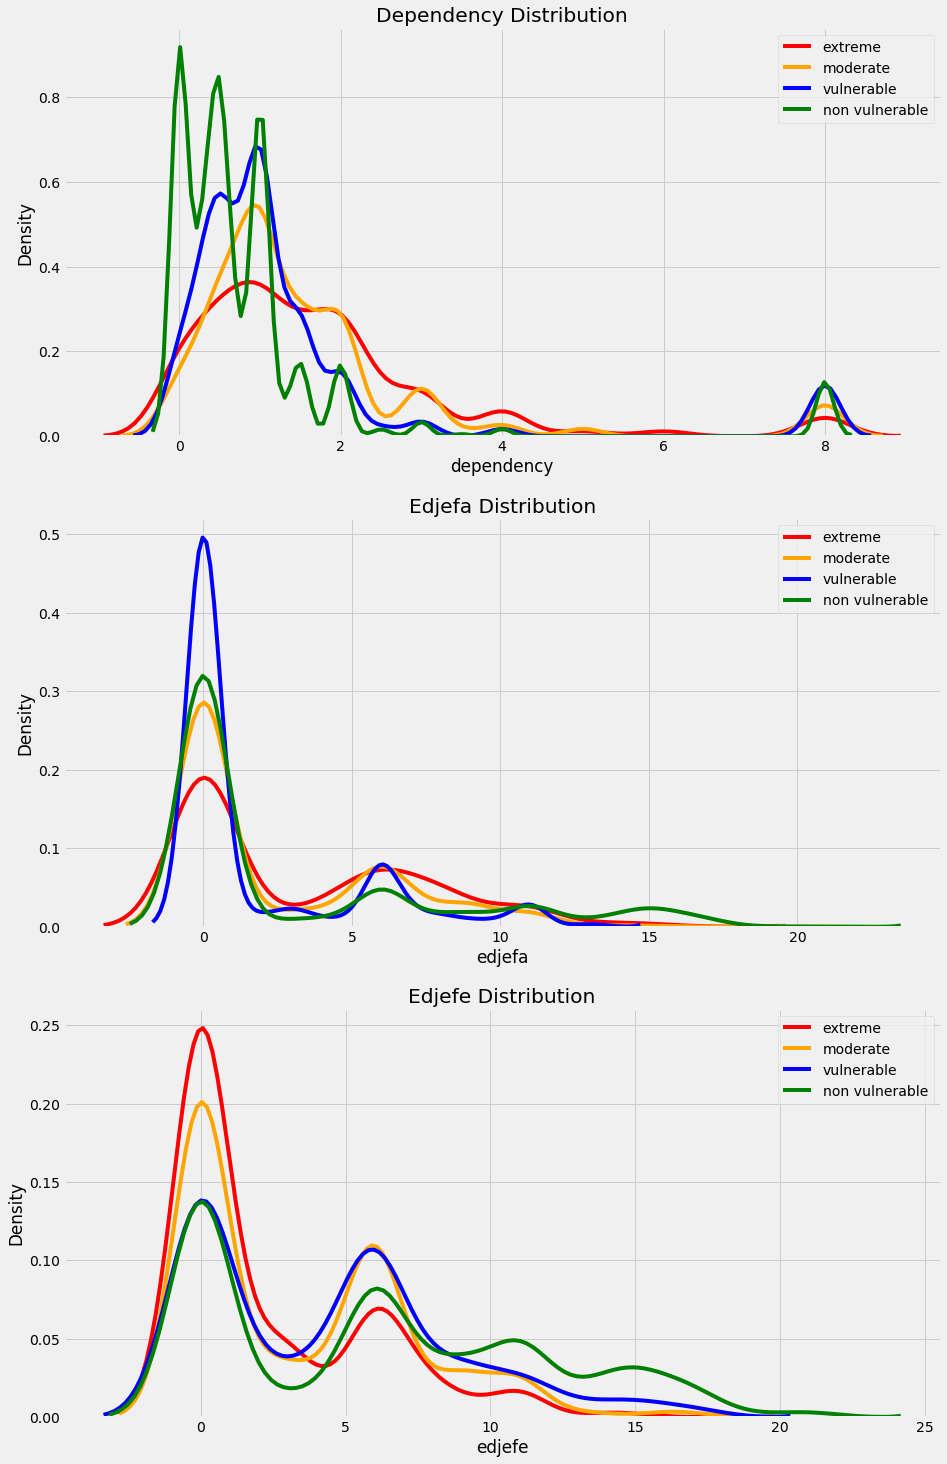

In [14]:
plt.figure(figsize=(14,10))

for i, col in enumerate(['dependency','edjefa','edjefe']):
    ax=plt.subplot(3,1,i+1)
    for poverty_level, color in colors.items():
        sns.kdeplot(train[col][train['Target']==poverty_level].dropna(), 
                   ax=ax, color=color, label=poverty_mapping[poverty_level])
        # train.loc[train['Target']==poverty_level, col] 로 해도 동일
    plt.title(f'{col.capitalize()} Distribution'); plt.xlabel(f'{col}'); plt.ylabel('Density')
                                                              
plt.subplots_adjust(top=2)

training 데이터와 testing 데이터 프레임을 join할것이다. train데이터와 test데이터에 동일한 feature engineering을 진행할 것이기 때문에. <br>
이후에 Target을 바탕으로 두 set을 분리시키면 된다.

In [15]:
# test데이터에 Null값인 'Target' 컬럼을 추가
test['Target'] = np.nan
data = train.append(test, ignore_index=True)   # append하면 train데이터 아래로 test데이터가 붙음.

### Exploring Label Distribution
label의 분포를 확인해 봄으로써, 문제가 얼마나 불균형한지 알수있다는 아이디어를 얻었다. <br>
여기에는 가난의 정도를 가르키는 4개의 가능한 integer level이 있다. <br>
정확한 label을 보기 위해, 우리는 parentesco1 ==1 인 컬럼만 볼것이다. 왜냐하면 이것은 head of household이기 때문이다. 

1.0     222
2.0     442
3.0     355
4.0    1954
Name: Target, dtype: int64

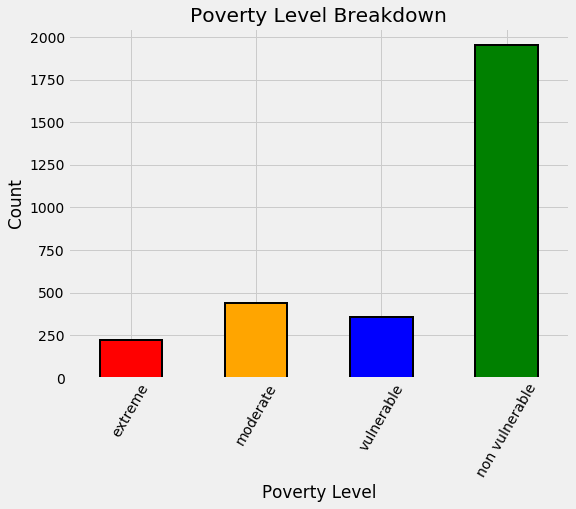

In [16]:
# parentesco1 가 1인 것들만 copy
heads = data.loc[data['parentesco1']==1].copy()

# training데이터의 label
train_labels = data.loc[(data['Target'].notnull()) & (data['parentesco1']==1), ['Target','idhogar']]

# Value counts of target
label_counts = train_labels['Target'].value_counts().sort_index()

# Bar plot of occurrences of each label
label_counts.plot.bar(figsize=(8,6), color=colors.values(), edgecolor='k', linewidth=2)

plt.xlabel('Poverty Level'); plt.ylabel('Count')
plt.xticks(ticks=[x-1 for x in poverty_mapping.keys()], labels=list(poverty_mapping.values()), rotation=60)
#plt.xticks([0,1,2,3],['extreme', 'moderate', 'vulnerable', 'non vulnerable'])
plt.title('Poverty Level Breakdown');

label_counts

우리는 imbalanced class problem 을 다루고 있다. 다른 카테고리보다 non vulnerable 로 분류된 가정이 매우 많은것을 볼 수 있다. <br>
extreme 클래스가 가장 적다. <br>
imbalanced classification problem의 문제는 머신러닝 모델은 어떤 클래스가 샘플이 매우 적으면 예측하는데 어려움을 겪는다. <br>
이를 해결할 한가지 방법은 oversampling이다. 

--------------------------------------------------------------------------------------------------------------------------------------------
### Addressing Wrong Labels
이 문제에서 몇몇 label은 정확하지 않을 것이다. 왜냐하면 같은 가정에서 각 개인은 다른 poverty level을 갖고 있기 때문이다. <br>
그래서 head of household 를 true label로 사용해야 할 것이다.

#### Identify Errors
다른 label을 갖고 있는 가정을 찾기 위해서는, 데이터를 household로 그룹핑한다. 그리고 Target값이 한개의 unique한 값만 있는지 확인한다.

In [17]:
# unique한 값의 개수가 1개인 (poverty level이 한종류만 있는 값만)
### 결과-> True, False값
all_equal = train.groupby('idhogar')['Target'].apply(lambda x: x.nunique() == 1)  #unique는 unique한 값의 개수

# 한 household에 target이 여러개 있는 (같지 않은) 가정
not_equal = all_equal[all_equal!= True]

print('There are {} households where the family members do not all have the same target.'.format(len(not_equal)))

There are 85 households where the family members do not all have the same target.


In [18]:
train[train['idhogar']==not_equal.index[0]][['idhogar','parentesco1','Target']]

,idhogar,parentesco1,Target
7651,0172ab1d9,0,3
7652,0172ab1d9,0,2
7653,0172ab1d9,0,3
7654,0172ab1d9,1,3
7655,0172ab1d9,0,2


정확한 label이려면 parentesco1 ==1 일때, 모든 멤버의 label이 3이어야 한다. <br>
우리는 이것을 정확한 poverty level로 reassigning할수있다. 

#### Families without Heads of Household
만약 head of household 가 없는 가정이라면 ? 혹은 가정의 멤버들의 label이 다른 가치를 갖고있다면 ?

In [19]:
# idhogar로 그룹핑 했을 때, parentesco1 합계
households_leader=train.groupby('idhogar')['parentesco1'].sum()

# isin()은 TRUE, FALSE값 반환
### idhogar로 그룹핑했을 때, parentesco1이 0인 것들의 인덱스를 행으로
households_no_head=train.loc[train['idhogar'].isin(households_leader[households_leader==0].index),:]

print('There are {} households without a head'.format(households_no_head['idhogar'].nunique()))

There are 15 households without a head


In [20]:
households_no_head_equal=households_no_head.groupby('idhogar')['Target'].apply(lambda x: x.nunique()==1)
print('{} Households with no head have different labels.'.format(sum(households_no_head_equal==False)))

0 Households with no head have different labels.


위 결과, 가장이 없는 가정에서 멤버들이 다른 label을 갖는 경우는 없다는 것을 알 수 있다. <br>
그러므로, 우리는 가장이 없는 가정은 training에 쓰지 않을 것이다. 

#### Correct Errors
가장이 있고, 구성원들이 다른 poverty level을 갖고 있는 가정의 경우 우리는 label을 고칠 수 있다. 

In [21]:
for household in not_equal.index:
    # 각 idhogar별로 가장이 있을 때(parentesco1==1) 의 target값이 정확한 label임.
    true_target = int(train[(train['idhogar']==household) &(train['parentesco1']==1.0)]['Target'])
    
    # household에 모든 member들의 label을 위에서 구한 true_target으로 바꾼다.
    train.loc[train['idhogar']==household,'Target'] = true_target
    
# household를 idhogar별로 그룹핑하고 unique한 'Target'값이 한개인 경우 True
all_equal = train.groupby('idhogar')['Target'].apply(lambda x:x.nunique()==1)

# Target이 False인 경우
not_equal = all_equal[all_equal!=True]
print('There are {} households where the family members do not all have the same target.'.format(len(not_equal)))

There are 0 households where the family members do not all have the same target.


--------------------------------------------------------------------------------------------------------------------------------------------
### Missing Variables
각 컬럼에서의 missing value percentage를 확인하자.

In [22]:
# 0이라는 컬럼명을 'total' 로 변경
missing=pd.DataFrame(data.isnull().sum()).rename(columns={0:'total'})

# Create a percentage missing
missing['percent'] = missing['total']/len(data)

missing.sort_values('percent', ascending=False).head(10).drop('Target')

,total,percent
rez_esc,27581,0.825457
v18q1,25468,0.762218
v2a1,24263,0.726154
SQBmeaned,36,0.001077
meaneduc,36,0.001077
hogar_adul,0,0.000000
parentesco10,0,0.000000
parentesco11,0,0.000000
parentesco12,0,0.000000


Target컬럼은 test데이터에 NaN값을 넣어줬기 때문에 신경쓸 필요 없다. 그러나 그 외에 상위 3개의 컬럼에 대해서는 고민해볼 필요 있음. <br>
* v18q1: 가정에서 소유한 테블릿 대수

In [23]:
# heads 변수는 가장인 경우만 가져온 데이터 (parentesco1==1)
def plot_value_counts(df, col, heads_only=False):
    """컬럼의 value를 count한것, 가정의 가장들 위주로"""
    if heads_only:
        df = df.loc[df['parentesco1']==1].copy()
    
    plt.figure(figsize=(8,6))
    df[col].value_counts().sort_index().plot.bar(color='blue', edgecolor='k', linewidth=2)
    plt.xlabel(f'{col}'); plt.title(f'{col} Value Counts');plt.ylabel('Count')
    plt.show();

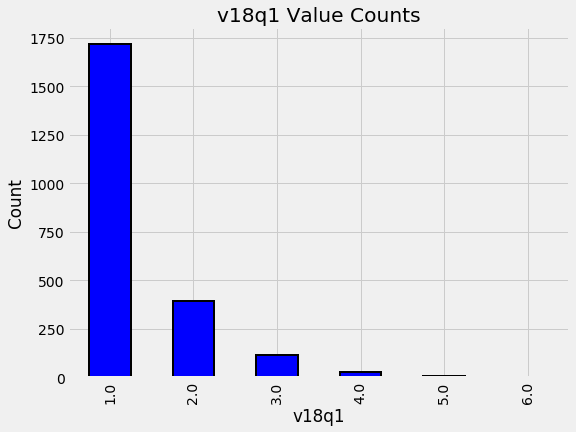

In [24]:
plot_value_counts(heads,'v18q1')

대부분 태블릿을 1대 가지고 있는 경우가 가장 많다. 그러나 우리는 missing 데이터에 대해서 고민해봐야 한다 .이경우에 nan이 있는 가정은 태블릿을 소유하고있지 않는다! <br> 
데이터 설명을 보면, v18q 컬럼은 가족이 태블릿을 소유하고 있는지, 아닌지를 나타낸다 .<br>
우리는 우리의 가정을 지지하기 위해, 태블릿 숫자와 이 컬럼을 결합해서 조사해야한다 . 

In [25]:
# nan값들의 태블릿 소유 여부 (0,1) 별 태블릿 대수 
heads.groupby('v18q')['v18q1'].apply(lambda x : x.isnull().sum())

v18q
0    8044
1       0
Name: v18q1, dtype: int64

* v18q1이 nan인 family는 태블릿을 소유하고 있지 않는다는것을 확인 했으므로, missing value를 모두 0으로 채울 수 있다. 

In [26]:
data['v18q1'] = data['v18q1'].fillna(0)

다음으로 missing value percentage가 높은 컬럼 -> v2a1
* v2a1: Monthly rent payment (월별 렌트 지불비용) <br>

월별 렌트비용을 살펴보기 전에, 집의 ownership/renting상태를 보여주는 'tipovivi_' 의 분포를 보는것도 의미가 있을 것이다. <br>


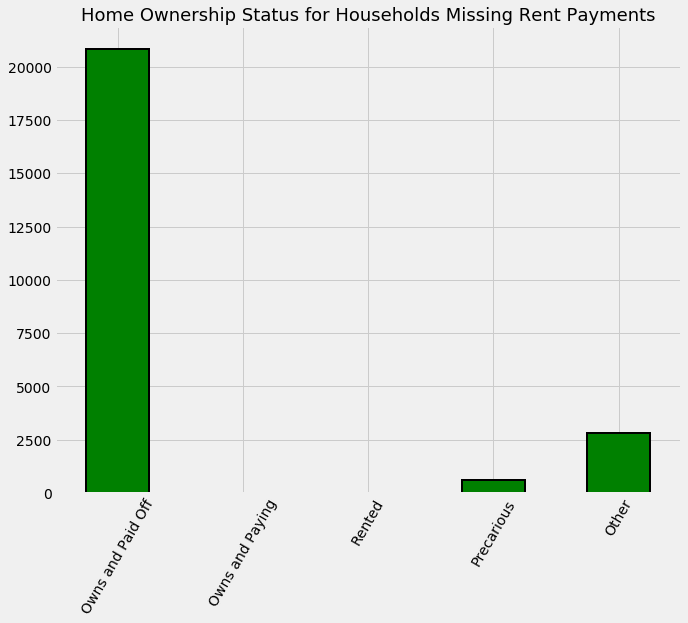

In [27]:
# home owenership을 나타내는 변수
own_variables=[x for x in data if x.startswith('tipo')]

# 렌트 지불비용이 nan인 것들의 ownership/renting상태를 보여주는 tipovivi_컬럼
data.loc[data['v2a1'].isnull(), own_variables].sum().plot.bar(figsize=(10,8), color='green', edgecolor='k', linewidth=2)

plt.xticks([0, 1, 2, 3, 4],
           ['Owns and Paid Off', 'Owns and Paying', 'Rented', 'Precarious', 'Other'],
          rotation = 60)
plt.title('Home Ownership Status for Households Missing Rent Payments', size = 18);

각각의 의미
* tipovivi1, =1 own and fully paid house
* tipovivi2, "=1 own,  paying in installments"
* tipovivi3, =1 rented
* tipovivi4, =1 precarious
* tipovivi5, "=1 other(assigned,  borrowed)"

=> 따라서,  v2a1 컬럼이 nan인 (즉, 월별 rent payment가 없는) 가정은 대부분 그들의 자가인 경우가 많다.  <br>
그러므로 자가이면서 monthly rent payment가 missing value인 경우는 rent payment값을 0으로 바꾸겠다. <br>
다른 경우에는 missing value가 대체되도록 그냥 둘것이나, 이 household가 missing value라는것을 나타내는 Boolean 컬럼을 추가할것이다. 

In [28]:
# 자기 집을 보유한 household의 rent payment는 0으로 대체
data.loc[(data['tipovivi1']==1), 'v2a1'] =0

# Create missing rent payment column
data['v2a1-missing'] = data['v2a1'].isnull()
data['v2a1-missing'].value_counts()

False    29994
True      3419
Name: v2a1-missing, dtype: int64

* rez_esc: years behind in school <br>
null 값이 있는 가족은 아마도 현재 학교를 다니는 아이들이 없다는 의미일 수 있다. <br>
age 컬럼을 통해서 rez_esc가 null값인 것들의 age와 null값이 아닌 것들의 age를 확인해보자.

In [29]:
# rez_esc컬럼이 null이 아닌것들의 age컬럼
data.loc[data['rez_esc'].notnull()]['age'].describe()

count    5832.000000
mean       12.185700
std         3.198618
min         7.000000
25%         9.000000
50%        12.000000
75%        15.000000
max        17.000000
Name: age, dtype: float64

rez_esc가 null값인 것들의 age를 봤을 때, 최대값이 17인것으로 보아 17살보다 나이가 많은 사람은 학교에 있지 않을 것이다. <br>
null값인 것들의 나이를 확인해보자.

In [30]:
data.loc[data['rez_esc'].isnull()]['age'].describe()

count    27581.000000
mean        39.110656
std         20.983114
min          0.000000
25%         24.000000
50%         38.000000
75%         54.000000
max         97.000000
Name: age, dtype: float64

이 competition의 discussion에서 이 변수는 7살에서 19살까지만 정의되는 것으로 확인했다. <br>
따라서, 만약 개인이 19살보다 많고 missing value일 경우 또는 만약 7살보다 어리고 missing value가 있을 경우 , 우리는 0으로 바꾸겠다.

In [31]:
# rez_esc값이 null이고, age가 19보다 크거나 또는 rez_esc값이 null이고, age 가 7보다 작으면 rez_esc값은 0으로 대입
data.loc[((data['age']>19) | (data['age']<7)) & (data['rez_esc'].isnull()), 'rez_esc'] = 0

# 나이가 7살~19살인 값들에는 표시를 해준다.
data['rez_esc-missing'] = data['rez_esc'].isnull()

rez_esc컬럼에는 outlier도 있다. competition discussion 에서 , 이 변수의 최대값은 5라고 나와있다. 그러므로, 5보다 큰 값들은 5로 변경.

In [32]:
data.loc[data['rez_esc']>5, 'rez_esc']=5

## Plot Two Categorical Variables
두 범주형 변수 시각화

In [33]:
def plot_categoricals(x, y, data, annotate = True):
    """Plot counts of two categoricals.
    Size is raw count for each grouping.
    Percentages are for a given value of y."""
    
    # Raw counts 
    raw_counts = pd.DataFrame(data.groupby(y)[x].value_counts(normalize = False))
    raw_counts = raw_counts.rename(columns = {x: 'raw_count'})
    
    # Calculate counts for each group of x and y
    counts = pd.DataFrame(data.groupby(y)[x].value_counts(normalize = True))
    
    # Rename the column and reset the index
    counts = counts.rename(columns = {x: 'normalized_count'}).reset_index()
    counts['percent'] = 100 * counts['normalized_count']
    
    # Add the raw count
    counts['raw_count'] = list(raw_counts['raw_count'])
    
    plt.figure(figsize = (14, 10))
    # Scatter plot sized by percent
    plt.scatter(counts[x], counts[y], edgecolor = 'k', color = 'lightgreen',
                s = 100 * np.sqrt(counts['raw_count']), marker = 'o',
                alpha = 0.6, linewidth = 1.5)
    
    if annotate:
        # Annotate the plot with text
        for i, row in counts.iterrows():
            # Put text with appropriate offsets
            plt.annotate(xy = (row[x] - (1 / counts[x].nunique()), 
                               row[y] - (0.15 / counts[y].nunique())),
                         color = 'navy',
                         s = f"{round(row['percent'], 1)}%")
        
    # Set tick marks
    plt.yticks(counts[y].unique())
    plt.xticks(counts[x].unique())
    
    # Transform min and max to evenly space in square root domain
    sqr_min = int(np.sqrt(raw_counts['raw_count'].min()))
    sqr_max = int(np.sqrt(raw_counts['raw_count'].max()))
    
    # 5 sizes for legend
    msizes = list(range(sqr_min, sqr_max,
                        int(( sqr_max - sqr_min) / 5)))
    markers = []
    
    # Markers for legend
    for size in msizes:
        markers.append(plt.scatter([], [], s = 100 * size, 
                                   label = f'{int(round(np.square(size) / 100) * 100)}', 
                                   color = 'lightgreen',
                                   alpha = 0.6, edgecolor = 'k', linewidth = 1.5))
        
    # Legend and formatting
    plt.legend(handles = markers, title = 'Counts',
               labelspacing = 3, handletextpad = 2,
               fontsize = 16,
               loc = (1.10, 0.19))
    
    plt.annotate(f'* Size represents raw count while % is for a given y value.',
                 xy = (0, 1), xycoords = 'figure points', size = 10)
    
    # Adjust axes limits
    plt.xlim((counts[x].min() - (6 / counts[x].nunique()), 
              counts[x].max() + (6 / counts[x].nunique())))
    plt.ylim((counts[y].min() - (4 / counts[y].nunique()), 
              counts[y].max() + (4 / counts[y].nunique())))
    plt.grid(None)
    plt.xlabel(f"{x}"); plt.ylabel(f"{y}"); plt.title(f"{y} vs {x}");

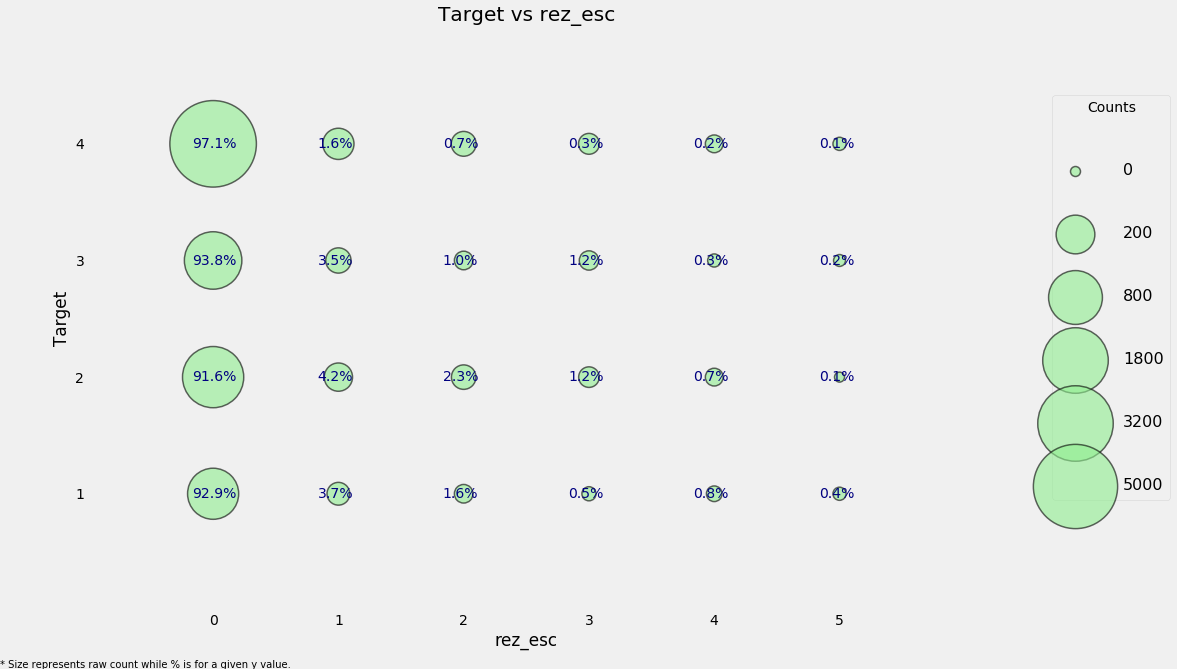

In [34]:
plot_categoricals('rez_esc', 'Target', data);

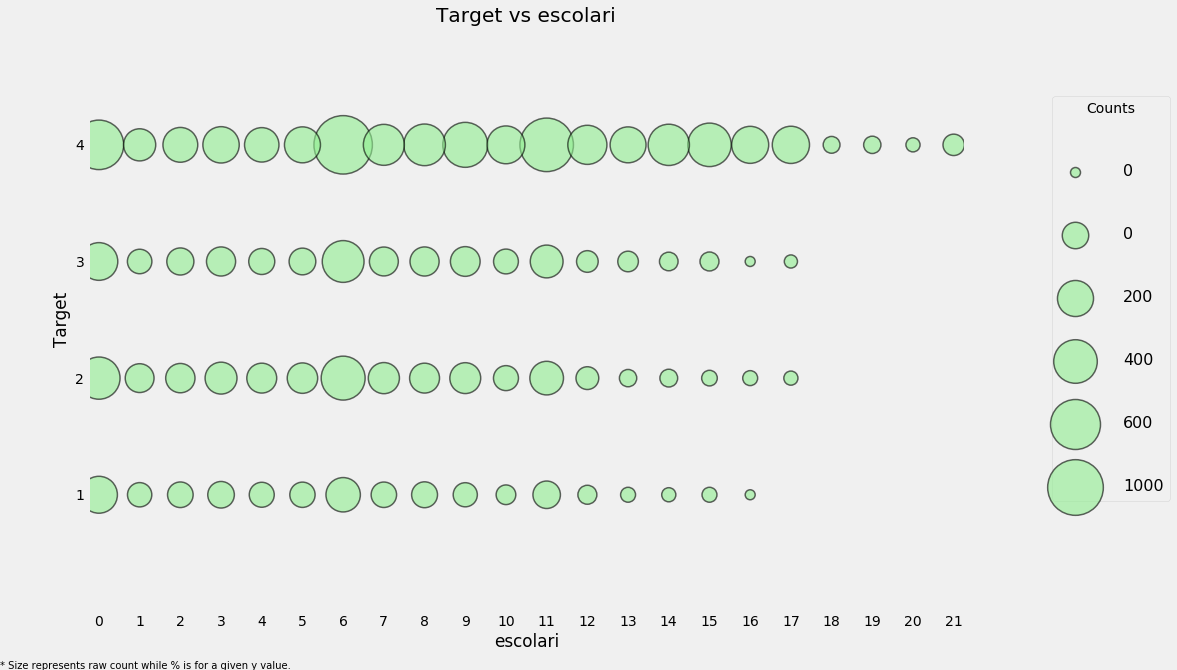

In [35]:
plot_categoricals('escolari', 'Target', data, annotate = False)

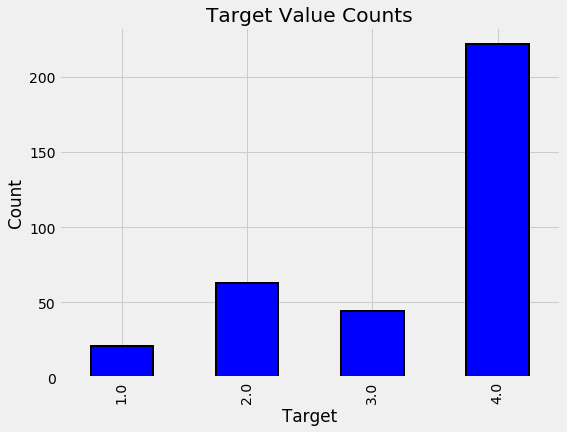

In [36]:
# 1이면 True, 0이면 False
### years behind school값이 null인 경우는 나이가 7살보다 어리거나, 19살보다 많은 경우
plot_value_counts(data[(data['rez_esc-missing'] == 1)], 
                  'Target')

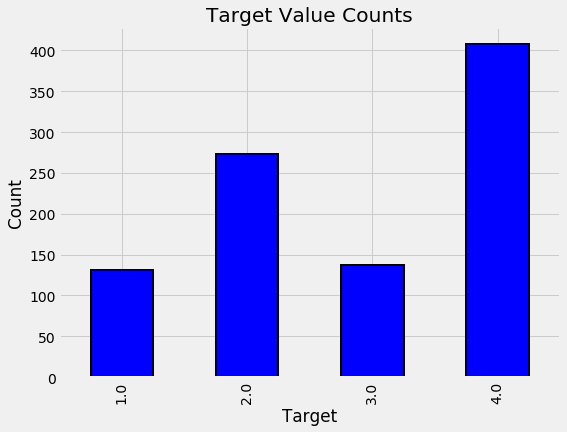

In [37]:
# v2a1이 null이란것은 집이 자기 소유라는 의미
plot_value_counts(data[(data['v2a1-missing'] == 1)], 
                  'Target')

위 결과를 통해 missing information이 주어진 정보보다 더 중요할때도 있다는것을 알수있다.

--------------------------------------------------------------------------------------------------------------------------------------------
## Feature Engineering
grouping , aggregation 작업

#### Column Definitions
process
* 변수들을 household level 과 individual level로 나눈다.
* individual level 데이터에 대해서 적절한 aggregation를 찾는다.
* individual aggregation 을 household level 데이터로 join한다. 

#### Define Variable Categories
변수들에 몇가지 다른 카테고리가 있다. <br>
1. Individual Variables: these are characteristics of each individual rather than the household
    * Boolean: Yes or No (0 or 1)
    * Ordered Discrete: Integers with an ordering
2. Household variables
    * Boolean: Yes or No
    * Ordered Discrete: Integers with an ordering
    * Continuous numeric
3. Squared Variables: derived from squaring variables in the data
4. Id variables: identifies the data and should not be used as features

In [38]:
id_ = ['Id', 'idhogar', 'Target']

In [39]:
# individual variables
ind_bool = ['v18q', 'dis', 'male', 'female', 'estadocivil1', 'estadocivil2', 'estadocivil3', 
            'estadocivil4', 'estadocivil5', 'estadocivil6', 'estadocivil7', 
            'parentesco1', 'parentesco2',  'parentesco3', 'parentesco4', 'parentesco5', 
            'parentesco6', 'parentesco7', 'parentesco8',  'parentesco9', 'parentesco10', 
            'parentesco11', 'parentesco12', 'instlevel1', 'instlevel2', 'instlevel3', 
            'instlevel4', 'instlevel5', 'instlevel6', 'instlevel7', 'instlevel8', 
            'instlevel9', 'mobilephone', 'rez_esc-missing']

ind_ordered = ['rez_esc', 'escolari', 'age']

In [40]:
# household variables
hh_bool = ['hacdor', 'hacapo', 'v14a', 'refrig', 'paredblolad', 'paredzocalo', 
           'paredpreb','pisocemento', 'pareddes', 'paredmad',
           'paredzinc', 'paredfibras', 'paredother', 'pisomoscer', 'pisoother', 
           'pisonatur', 'pisonotiene', 'pisomadera',
           'techozinc', 'techoentrepiso', 'techocane', 'techootro', 'cielorazo', 
           'abastaguadentro', 'abastaguafuera', 'abastaguano',
            'public', 'planpri', 'noelec', 'coopele', 'sanitario1', 
           'sanitario2', 'sanitario3', 'sanitario5',   'sanitario6',
           'energcocinar1', 'energcocinar2', 'energcocinar3', 'energcocinar4', 
           'elimbasu1', 'elimbasu2', 'elimbasu3', 'elimbasu4', 
           'elimbasu5', 'elimbasu6', 'epared1', 'epared2', 'epared3',
           'etecho1', 'etecho2', 'etecho3', 'eviv1', 'eviv2', 'eviv3', 
           'tipovivi1', 'tipovivi2', 'tipovivi3', 'tipovivi4', 'tipovivi5', 
           'computer', 'television', 'lugar1', 'lugar2', 'lugar3',
           'lugar4', 'lugar5', 'lugar6', 'area1', 'area2', 'v2a1-missing']

hh_ordered = [ 'rooms', 'r4h1', 'r4h2', 'r4h3', 'r4m1','r4m2','r4m3', 'r4t1',  'r4t2', 
              'r4t3', 'v18q1', 'tamhog','tamviv','hhsize','hogar_nin',
              'hogar_adul','hogar_mayor','hogar_total',  'bedrooms', 'qmobilephone']

hh_cont = ['v2a1', 'dependency', 'edjefe', 'edjefa', 'meaneduc', 'overcrowding']

In [41]:
# squared values (제곱 변수)
sqr_ = ['SQBescolari', 'SQBage', 'SQBhogar_total', 'SQBedjefe', 
        'SQBhogar_nin', 'SQBovercrowding', 'SQBdependency', 'SQBmeaned', 'agesq']

In [42]:
x = ind_bool + ind_ordered + id_ + hh_bool + hh_ordered + hh_cont + sqr_
from collections import Counter

print('There are no repeats: ', np.all(np.array(list(Counter(x).values())) == 1))
print('We covered every variable: ', len(x) == data.shape[1])

There are no repeats:  True
We covered every variable:  True


#### Squared Variables
SQBage 와 age 컬럼의 관계를 살펴보자.

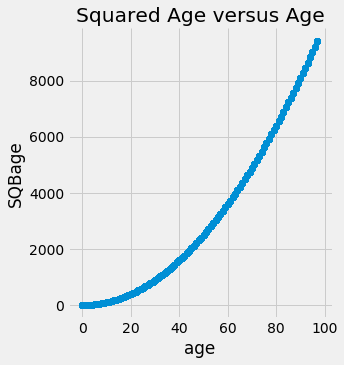

In [43]:
sns.lmplot('age', 'SQBage', data = data, fit_reg=False);
plt.title('Squared Age versus Age');

이 두 변수는 correlated가 높으므로, 둘다 가져갈 필요는 없어보인다.

In [44]:
# squared 변수 (제곱항 변수) 제거
data = data.drop(columns=sqr_)
data.shape

(33413, 136)

#### Id Variables
These are pretty simple: they will be kept as is in the data since we need them for identification

#### Household Level Variables
First let's subset to the heads of household and then to the household level variables.

In [45]:
# 가장인 경우만 heads 변수에 저장.
heads = data.loc[data['parentesco1']==1,:]
# 위에서 정의한 컬럼들만 heads변수에 저장
heads = heads[id_ + hh_bool+hh_cont+hh_ordered]
heads.shape

(10307, 99)

우리는 이러한 변수들을 feature로 사용할 것이다. 그러나, 불필요한 변수들은 제거할 것이고 또한 현재 갖고있는 데이터로부터 더 많은 feature들을 추가할 것이다.

--------------------------------------------------------------------------------------------------------------------------------------------
#### Redundant Household Variables
모든 household 변수들 간의 상관관계를 볼것이다. 만약 상관관계가 너무 큰것이 있으면, 둘중 하나는 제거할지도 모른다.

In [46]:
corr_matrix = heads.corr()

# np.triu()는 위의 삼각형값만 가져오도록. k=1은 대각선 값 취급안하고 가져옴.
## astype(np.bool) 은 True, False값으로 반환.
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# 상관계수 절대값이 0.95보다 큰 컬럼이 하나라도 있는경우
to_drop = [column for column in upper.columns if any(abs(upper[column])>0.95)]

to_drop

['coopele', 'area2', 'tamhog', 'hhsize', 'hogar_total']

위 변수들은 상관계수 한짝임. 나머지 한짝을 찾아내보자.

In [47]:
# 행과 열 모두에서 'tamhog' 변수값이 0.9보다 큰 경우 
corr_matrix.loc[corr_matrix['tamhog'].abs() > 0.9, corr_matrix['tamhog'].abs() > 0.9]

,r4t3,tamhog,tamviv,hhsize,hogar_total
r4t3,1.000000,0.998287,0.910457,0.998287,0.998287
tamhog,0.998287,1.000000,0.909155,1.000000,1.000000
tamviv,0.910457,0.909155,1.000000,0.909155,0.909155
hhsize,0.998287,1.000000,0.909155,1.000000,1.000000
hogar_total,0.998287,1.000000,0.909155,1.000000,1.000000


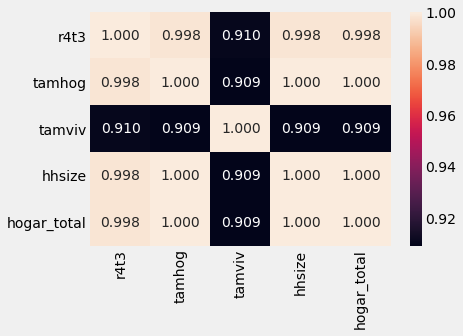

In [48]:
sns.heatmap(corr_matrix.loc[corr_matrix['tamhog'].abs() > 0.9, corr_matrix['tamhog'].abs() > 0.9], annot=True, fmt='.3f');

관련 변수 info
* r4t3 : Total persons in the household (가정에 총 사람 수)
* tamhog : size of the household (가정의 크기)
* tamviv : number of persons living in the household (가정에 살고있는 사람 수)
* hhsize : household size (가정의 크기)
* hogar_total: # of total individuals in the household (가정의 개개인 수?)

결과를 보면, hhsize 변수는 tamhog변수와 hogar_total변수와 완벽하게 상관관계가 있다 . 우리는 이 두 변수를 제거할것이다.<br>
또한 우리는 r4t3 변수도 제거할것이다. 왜냐하면, hhsize변수와 거의 완벽히 상관관계가 있기 때문에. <br>

tamviv변수는 hhsize변수 만큼 완전 똑같진 않다. 왜냐하면 가족 구성원중에 집에 살고있지 않은 사람도 있을 수 있기 때문에. <br>
시각화를 통해 더 알아보자.

In [49]:
heads = heads.drop(columns=['tamhog','hogar_total','r4t3'])

/Users/suhyun/anaconda3/envs/suhyun/lib/python3.7/site-packages/seaborn/regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


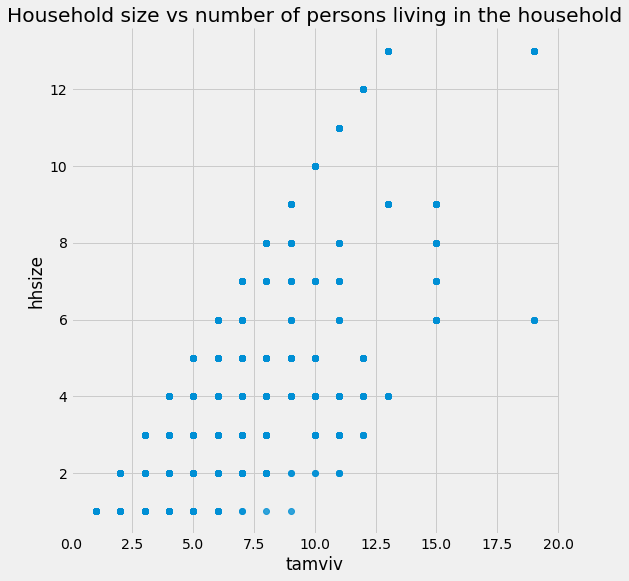

In [50]:
sns.lmplot('tamviv','hhsize', data, fit_reg=False, size=8);
plt.title('Household size vs number of persons living in the household');

household에 살고있는 사람들이 family에 있는거보다 많다. 이것은 새로운 feature에 대한 좋은 정보를 준다. 이 두 measurements 의 차이!

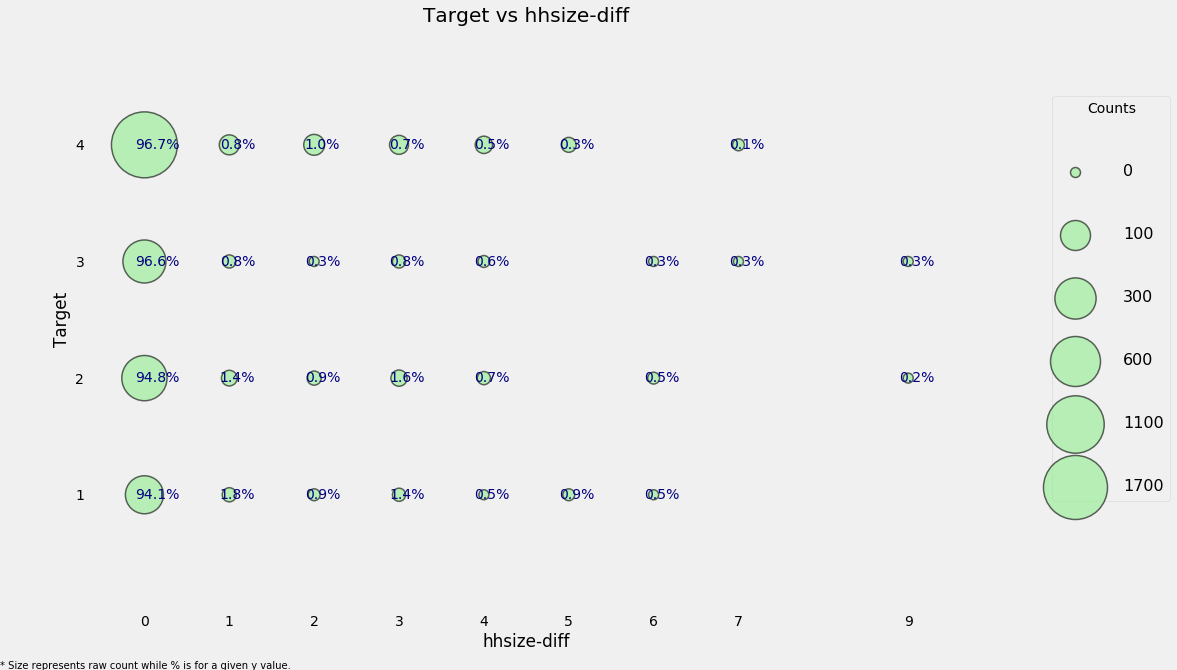

In [51]:
heads['hhsize-diff']=heads['tamviv'] - heads['hhsize']
plot_categoricals('hhsize-diff', 'Target', heads)

모든 household가 차이가 있는건 아니지만, household의 member보다 살고있는 사람들이 더 많은 경우가 몇 있다.<br>
이제 또 다른 불필요한 변수들을 살펴보자. 우선 coopele변수 를 살펴보자.

In [52]:
corr_matrix.loc[corr_matrix['coopele'].abs() >0.9, corr_matrix['coopele'].abs()>0.9]

,public,coopele
public,1.000000,-0.967759
coopele,-0.967759,1.000000


이 변수는 집에 전기를 어디로부터 받느냐 하는 변수이다. 4개의 option이 있다. <br>
noelec 는 no electricity 이고, planpri 는 private plant로부터 받는다는것임.

--------------------------------------------------------------------------------------------------------------------------------------------
#### Creating Ordinal Variable
ordinal 변수를 만듬으로써, 이 네개의 변수를 하나로 압축시키겠다. 각 숫자로 의미에 따라 mapping시킴.
* 0: No electricity
* 1: Electricity from cooperative
* 2: Electricity from CNFL, ICA, ESPH/JASEC
* 3: Electricity from private plant

값이 0인 household는 nan으로 채우겠다. 그리고 여기에 값이 없었다는 것을 표기하기 위해 Boolean 컬럼을 추가할것이다. 

In [53]:
elec =[]

# 각 컬럼을 돌아가면서 값이 1이면 elec변수에 값을 할당
for i, row in heads.iterrows():
    if row['noelec']==1:
        elec.append(0)
    elif row['coopele']==1:
        elec.append(1)
    elif row['public']==1:
        elec.append(2)
    elif row['planpri']==1:
        elec.append(3)
    else:
        elec.append(np.nan)

# elec 변수 새로 추가
heads['elec']=elec

# nan인 값인지 아닌지 남기기위해 새로운 컬럼 추가 
heads['elec-missing']=heads['elec'].isnull()         # null값이면 True

# Remove the electricity columns
# heads = heads.drop(columns = ['noelec', 'coopele', 'public', 'planpri'])

In [54]:
heads = heads.drop(columns = ['noelec', 'coopele', 'public', 'planpri'])

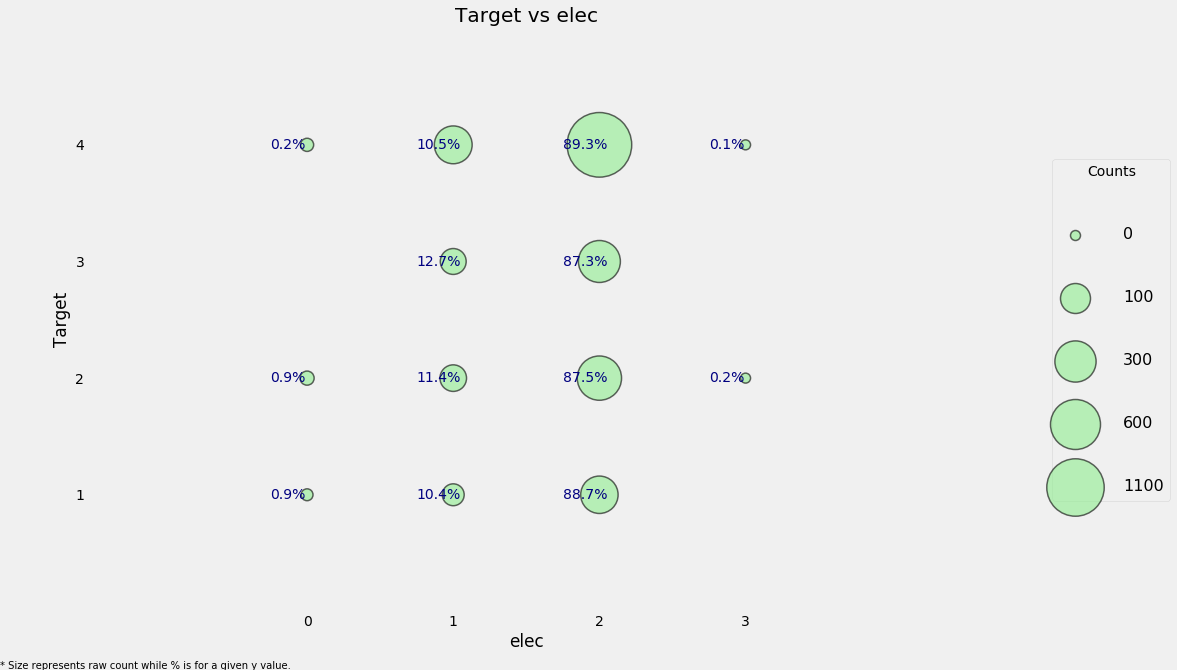

In [55]:
plot_categoricals('elec','Target', heads)

listed providers 로 부터 오는 electricity 가 가장 많다는 것을 확인.

이제 불필요한 컬럼 area2 를 살펴보자. 이 변수는 집이 시골에 있는지 여부를 나타낸다. <br>
그러나 우리는 집이 도시에 있는지를 나타내는 컬럼(area1)이 있기 때문에 이는 불필요하므로 삭제

In [56]:
heads = heads.drop(columns='area2')
heads.groupby('area1')['Target'].value_counts(normalize=True)

area1  Target
0      4.0       0.582249
       2.0       0.176331
       3.0       0.147929
       1.0       0.093491
1      4.0       0.687030
       2.0       0.137688
       3.0       0.108083
       1.0       0.067199
Name: Target, dtype: float64

도시지역에 있는 가정이 시골에 있는 가정보다 poverty level이 낮을 경우가 더 많다는 것을 알 수 있다. <br>
즉, 도시에 사는 사람들이 덜 가난하다..


#### Creating Ordinal Variables
집의 벽, 지붕, 바닥에 관해 세개의 컬럼이 있다. 첫번째는 'bad'를 가르키고, 두번째는 'regular, 세번째는 'good'를 가르킨다. <br>
이 변수들을 그냥 boolean값으로 둘수도있지만, ordinal 변수로 바꾸는게 더 나아보인다. <br>
왜냐하면 bad < regular < good 이라는 순서가 내재되어 있기 때문에. 이렇게 하면, 어떤 컬럼이 non-zero인지 np.argmax를통해 알 수 있다. <br>
* np.argmax(a,axis=1) axis가 1일경우 y축 기준 : axis에 해당하는 값들 중 가장 큰 값의 인덱스를 반환하는 함수
    * 아래의 경우는 epared1가 1이면 0, epared2가 1이면 1, epared3가 1이면 2

In [57]:
heads[['epared1', 'epared2', 'epared3']].head()

,epared1,epared2,epared3
0,0,1,0
1,0,1,0
2,0,1,0
5,0,0,1
8,1,0,0


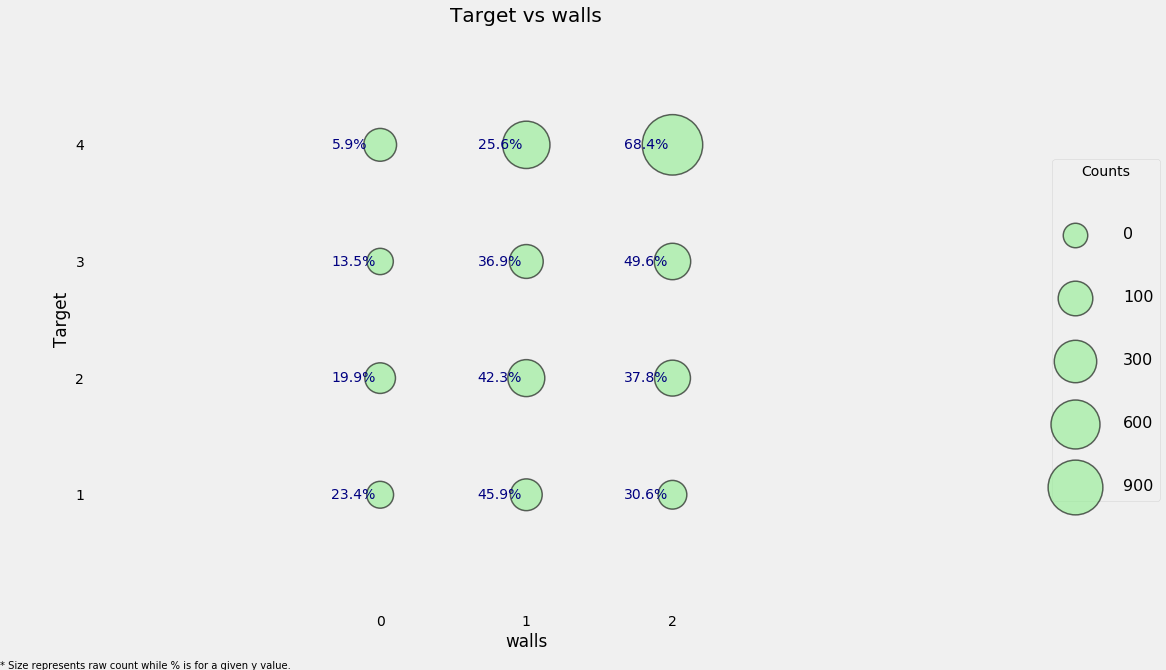

In [58]:
# Wall ordinal variable
heads['walls']=np.argmax(np.array(heads[['epared1','epared2','epared3']]),axis=1)
heads = heads.drop(columns = ['epared1', 'epared2', 'epared3'])
plot_categoricals('walls','Target', heads)

In [59]:
# Roof ordinal variable
heads['roof'] = np.argmax(np.array(heads[['etecho1','etecho2','etecho3']]), 
                          axis=1)
heads = heads.drop(columns=['etecho1','etecho2','etecho3'])

# Floor ordinal variable
heads['floor'] = np.argmax(np.array(heads[['eviv1', 'eviv2', 'eviv3']]),
                           axis = 1)
heads = heads.drop(columns = ['eviv1', 'eviv2', 'eviv3'])

--------------------------------------------------------------------------------------------------------------------------------------------
#### Feature Construction
우리는 기존 데이터로부터 완전히 새로운 feature를 만들수있는데, 이것이 흔히 말하는 feature construction 이다. <br>
전반적인 house's structure의 quality를 위해 이전의 세개의 feature들을 더해볼 수 있다.

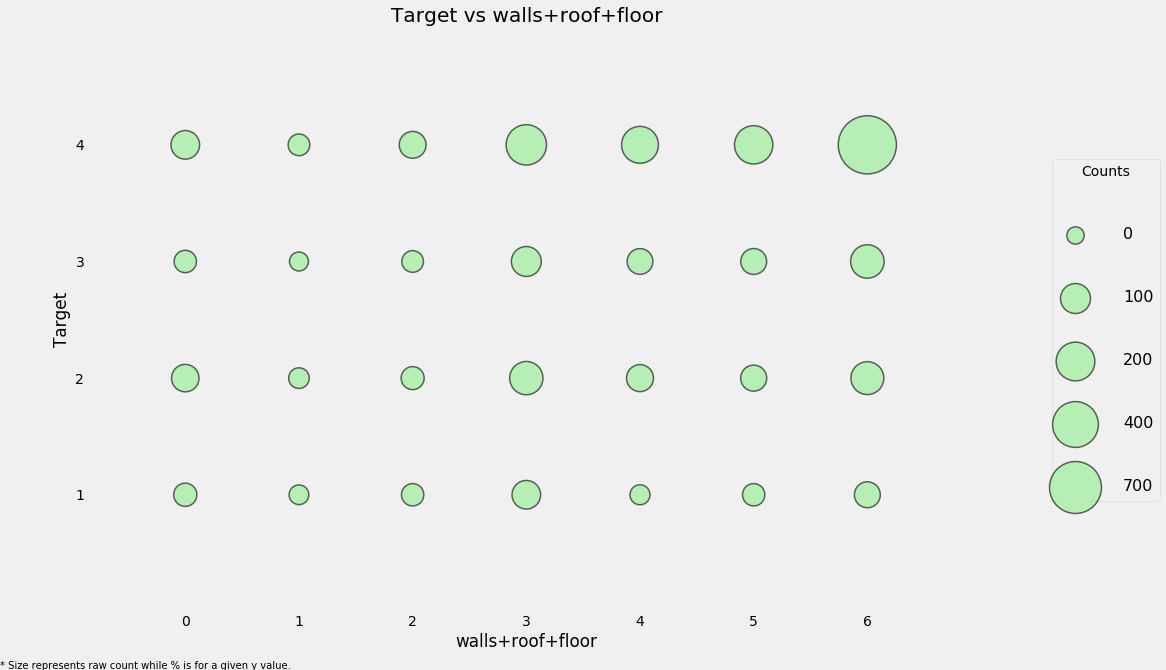

In [60]:
# Create new feature
heads['walls+roof+floor'] = heads['walls'] + heads['roof'] + heads['floor']
plot_categoricals('walls+roof+floor', 'Target', heads, annotate=False)

In [61]:
counts = pd.DataFrame(heads.groupby(['walls+roof+floor'])['Target'].value_counts(normalize = True)).rename(columns = {'Target': 'Normalized Count'}).reset_index()
counts.head()

,walls+roof+floor,Target,Normalized Count
0,0,4.0,0.376404
1,0,2.0,0.320225
2,0,1.0,0.162921
3,0,3.0,0.140449
4,1,4.0,0.323529


다음 변수는 house의 quality에 대한 warning이 될것이다. 이것은 -1인 음수값일 것이며, no toilet, electricity, floor, water service, and ceiling 에 대한 것이다.

In [62]:
# No toilet, no electricity, no floor, no water service, no ceiling
### True, False로 나오는 Boolean값에 1을 곱하면 숫자로 변환됨. (False=0, True=1)
heads['warning'] = 1 * (heads['sanitario1'] + 
                         (heads['elec'] == 0) + 
                         heads['pisonotiene'] + 
                         heads['abastaguano'] + 
                         (heads['cielorazo'] == 0))

warning 변수 숫자가 크면클수록 위험한것

In [63]:
(heads['elec'] == 0).head()

0    False
1    False
2    False
5    False
8    False
Name: elec, dtype: bool

In [64]:
1*(heads['elec'] == 0).head()

0    0
1    0
2    0
5    0
8    0
Name: elec, dtype: int64

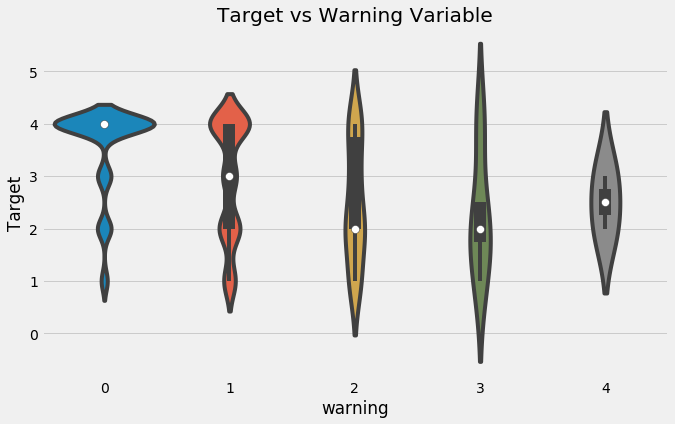

In [65]:
plt.figure(figsize=(10,6))
sns.violinplot(x='warning', y='Target', data=heads);
plt.title('Target vs Warning Variable');

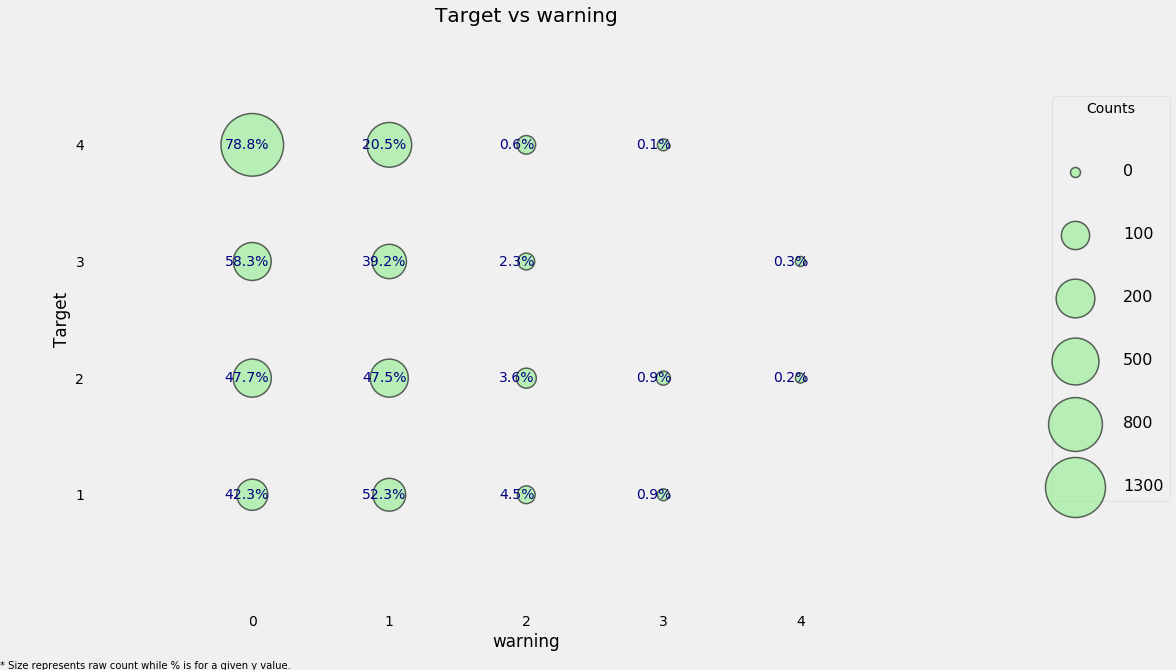

In [66]:
plot_categoricals('warning', 'Target', data = heads)

위 결과 warning sign이 없는 가정이 많다는 것을 알 수 있고, poverty수준도 낮다는것을 알 수 있다. 

마지막 household feature는 'bonus'인데, 이것은 가족이 냉장고, 컴퓨터, 태블릿, 또는 tv를 샀을때 받은 포인트이다.

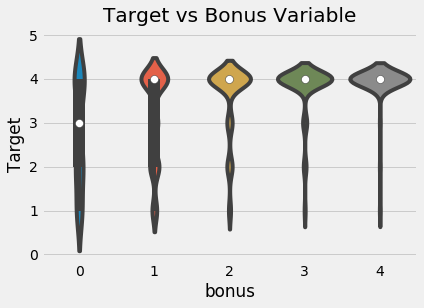

In [67]:
# Owns a refrigerator, computer, tablet, and television
heads['bonus'] = 1 * (heads['refrig'] + 
                      heads['computer'] + 
                      (heads['v18q1'] > 0) + 
                      heads['television'])
sns.violinplot('bonus','Target', data=heads, figsize=(10,6))
plt.title('Target vs Bonus Variable');

#### Per Capita Features
household에서 사람 당 특정 measurements 대수를 계산한 feature를 추가할수있다. <br>
* tamviv : 가정에 살고있는 사람 수

In [68]:
heads['phones-per-capita'] = heads['qmobilephone'] / heads['tamviv']
heads['tablets-per-capita'] = heads['v18q1'] / heads['tamviv']
heads['rooms-per-capita'] = heads['rooms'] / heads['tamviv']
heads['rent-per-capita'] = heads['v2a1'] / heads['tamviv']

--------------------------------------------------------------------------------------------------------------------------------------------
### Exploring Household Variables
이제, Target과의 연관성을 보려고 한다. 이전에 조금 했었지만, 이제는 그 관계를 quantify(수량화) 하려고 한다.

#### Measuring Relationships 
피어슨 상관계수와 스피어만 상관계수 두가지가 있다.
1. 피어슨(The Pearson Correlation): from -1 to 1 measuring the linear relationship between two variables
    * 분석하고자 하는 두 변수가 모두 연속형 자료일 때 두 변수간 선형적인 상관 관계의 크기를 모수적인 방법으로 나타내는 값.
2. 스피어만(The Spearman Correlation): from -1 to 1 measuring the monotonic relationship between two variables
    * 상관 관계를 분석하고자 하는 두 연속형 변수의 분포가 심각하게 정규분포를 벗어난다거나, 또는 두 변수가 순위척도 자료일때 사용하는 값.
    * ex) 어떤 고등학교 3학년 학생들의 모의고사 성적을 각 과목별로 등수로 매겼을 때, 언어영역의 등수와 수리영역의 등수가 서로 상관 관계가 있는지 알아볼 때.
    * 스피어만 상관계수는 피어슨 상관계수와 달리, 선형적인 상관 관계를 나타내지 않고, 단순히 한 변수가 증가할 때 다른 변수가 증가하는지 감소하는지에 대한 관계만을 나타낸다. 

In [69]:
from scipy.stats import spearmanr

In [70]:
def plot_corrs(x, y):
    """Plot data and show the spearman and pearson correlation."""
    
    # Calculate correlations
    spr = spearmanr(x, y).correlation
    pcr = np.corrcoef(x, y)[0, 1]      # 2x2행렬에서 0행 1열 값
    
    # Scatter plot
    ### 상관관계를 확인할 두 컬럼을 하나의 데이터프레임으로 만들어줌
    data = pd.DataFrame({'x': x, 'y': y})
    plt.figure( figsize = (6, 4))
    sns.regplot('x', 'y', data = data, fit_reg = False);
    plt.title(f'Spearman: {round(spr, 2)}; Pearson: {round(pcr, 2)}');

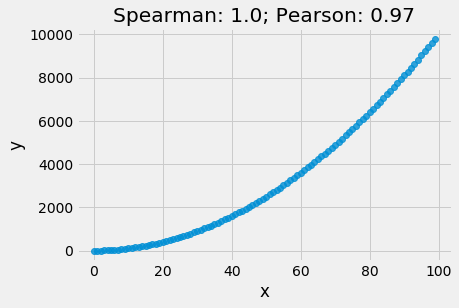

In [71]:
x = np.array(range(100))
y = x ** 2

plot_corrs(x,y)

Spearman 상관관계가 Target과 같은 ordinal variables 에는 더 낫다. <br>
대부분 실제 상황에서는 선형관계가 아니기 때문에, 그리고 Pearson 상관관계는 정확하지 않기 때문에 Spearman이 낫다.

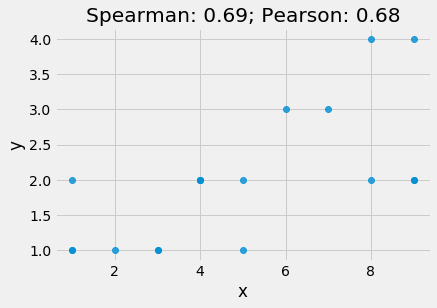

In [72]:
x = np.array([1, 1, 1, 2, 3, 3, 4, 4, 4, 5, 5, 6, 7, 8, 8, 9, 9, 9])
y = np.array([1, 2, 1, 1, 1, 1, 2, 2, 2, 2, 1, 3, 3, 2, 4, 2, 2, 4])

plot_corrs(x, y)

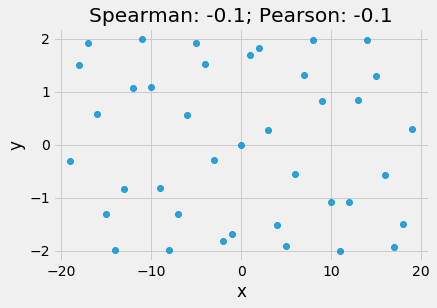

In [73]:
x = np.array(range(-19, 20))
y = 2 * np.sin(x)

plot_corrs(x, y)

우선, 모든 변수와 Target간의 피어슨 상관계수를 구해보겠다.

In [74]:
# Target값이 null이 아닌 데이터만 copy
train_heads=heads.loc[heads['Target'].notnull(), :].copy()

# Target컬럼과의 피어슨 상관계수값을 구한 컬럼
pcorrs=pd.DataFrame(train_heads.corr()['Target'].sort_values()).rename(columns={'Target':'pcorr'}).reset_index()
pcorrs = pcorrs.rename(columns = {'index':'feature'})

print('Most negatively correlated variables:')
print(pcorrs.head())

print('\nMost positively correlated variables:')
print(pcorrs.dropna().tail())

Most negatively correlated variables:
        feature     pcorr
0       warning -0.301791
1     hogar_nin -0.266309
2          r4t1 -0.260917
3  overcrowding -0.234954
4          r4m1 -0.209479

Most positively correlated variables:
              feature     pcorr
87  phones-per-capita  0.299026
88              floor  0.307605
89   walls+roof+floor  0.332446
90           meaneduc  0.333652
91             Target  1.000000


[negavie correlation에 대해서] <br>
warning이 증가함에 따라, poverty level 또한 증가한다는 것은 일리가 있다. 왜냐하면 이것은 가정에 잠재적인 나쁜 신호를 의미하기 때문이다.<br>
* warning컬럼이 음의 상관관계가 높은데, 그 뜻은 warning이 높을수록 가난할수 있다는 것이므로 poverty level 이 1에가까울 가능성이높다는 의미.

'hogar_nin' 은 0-19세 아이들의 수 인데, 어린 아이들은 가정에 재정적으로 부담이 될 수 있기 때문에 아이들 수가 많을수록 poverty는 1에 가까울 가능성이높음.  <br>


[positive correlation에 대해서] <br>
가장 높은 상관관계를 가지는 변수는 'meaneduc' 인데, 이것은 성인의 평균 교육수준을 말한다. <br>
즉, 교육 수준이 높을수록 부유할 가능성이 높다는 의미. <br>


상관계수의 일반적인 가이드라인은 아래와 같다. <br>
* .00-.19 “very weak”
* .20-.39 “weak”
* .40-.59 “moderate”
* .60-.79 “strong”
* .80-1.0 “very strong”

이제 스피어만 상관관계로 넘어가보자.

In [75]:
import warnings
warnings.filterwarnings('ignore', category = RuntimeWarning)

# feats, scorr, pvalues라는 빈 리스트를 만들고,
feats = []
scorr = []
pvalues = []

for c in heads:
    # 수치형만 상관계수를 구할 수 있기 때문에 object형태는 제외
    if heads[c].dtype !='object':
        # 수치형인 변수들만 heads에서 가져와서 feats리스트에 append
        feats.append(c)
        
        # scorr리스트에 스피어만 상관계수 계산한 값을 append
        scorr.append(spearmanr(train_heads[c], train_heads['Target']).correlation)
        # pvalues 리스트에 p-value를 append
        pvalues.append(spearmanr(train_heads[c], train_heads['Target']).pvalue)
        
# scorrs리스트에 feature, scorr, pvalue라는 컬럼이름의 데이터프레임을 만들고 각 값을 할당한 후 scorr가 큰 순으로 정렬        
scorrs = pd.DataFrame({'feature':feats, 'scorr':scorr, 'pvalue':pvalues}).sort_values('scorr')

In [76]:
print('Most negative Spearman correlations:')
print(scorrs.head())
print('\nMost positive Spearman correlations:')
print(scorrs.dropna().tail())

Most negative Spearman correlations:
        feature     scorr        pvalue
87      warning -0.307326  4.682829e-66
58   dependency -0.281516  2.792620e-55
75    hogar_nin -0.236225  5.567218e-39
70         r4t1 -0.219226  1.112230e-33
8   pisocemento -0.209387  8.270816e-31

Most positive Spearman correlations:
              feature     scorr        pvalue
23          cielorazo  0.300996  2.611808e-63
85              floor  0.309638  4.466091e-67
89  phones-per-capita  0.337377  4.760104e-80
86   walls+roof+floor  0.338791  9.539346e-81
0              Target  1.000000  0.000000e+00


* 스피어만, 피어슨 둘다 결과는 비슷하게 나옴.

In [77]:
# 스피어만, 피어슨 상관계수 두개 merge
corrs = pcorrs.merge(scorrs, on='feature')
corrs['diff'] = corrs['pcorr'] - corrs['scorr']

corrs.sort_values('diff').head()

,feature,pcorr,scorr,pvalue,diff
69,rooms-per-capita,0.152185,0.223303,6.521453e-35,-0.071119
77,v18q1,0.197493,0.244200,1.282664e-41,-0.046708
79,tablets-per-capita,0.204638,0.248642,3.951568e-43,-0.044004
2,r4t1,-0.260917,-0.219226,1.112230e-33,-0.041691
87,phones-per-capita,0.299026,0.337377,4.760104e-80,-0.038351


In [78]:
corrs.sort_values('diff').dropna().tail()

,feature,pcorr,scorr,pvalue,diff
50,techozinc,0.014357,0.003404,8.528369e-01,0.010954
44,hogar_mayor,-0.025173,-0.041722,2.290994e-02,0.016549
80,edjefe,0.235687,0.214736,2.367521e-32,0.020951
58,edjefa,0.052310,0.005114,7.804715e-01,0.047197
13,dependency,-0.126465,-0.281516,2.792620e-55,0.155051


가장 큰 모순은 'dependency' 컬럼이다. <br>
Target컬럼과 dependency컬럼의 scatterplot을 만들어서 관계를 확인해보자. <br>
약간의 jitter를 plot에 추가할것이다. 왜냐하면 이것은 둘다 이산형(discrete)변수이기 때문에.

Text(0.5, 1.0, 'Target vs Dependency')

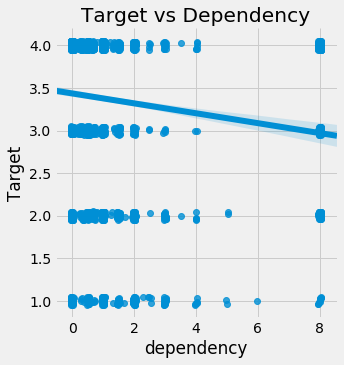

In [79]:
sns.lmplot('dependency','Target', fit_reg = True, data=train_heads, x_jitter=0.05, y_jitter=0.05);
plt.title('Target vs Dependency')

관계를 확인하기는 어렵지만, 음의 방향인걸로 알 수 있다. dependency가 증가할수록, Target이 감소하는 경향. <br>
dependency는 dependent한 사람수를  non-dependent 사람 수로 나눈것이기 때문에 일리가 있다. <br>
dependent한 구성원이 많을수록 (일을 안하는), poverty level이 높을 수 있다 .왜냐하면 non-dependent한 사람이 그들을 책임져야하기 때문에

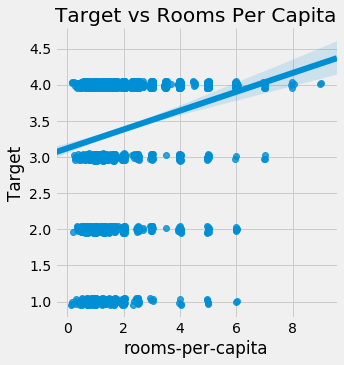

In [80]:
sns.lmplot('rooms-per-capita','Target', fit_reg=True, data=train_heads, x_jitter=0.05, y_jitter=0.05)
plt.title('Target vs Rooms Per Capita');

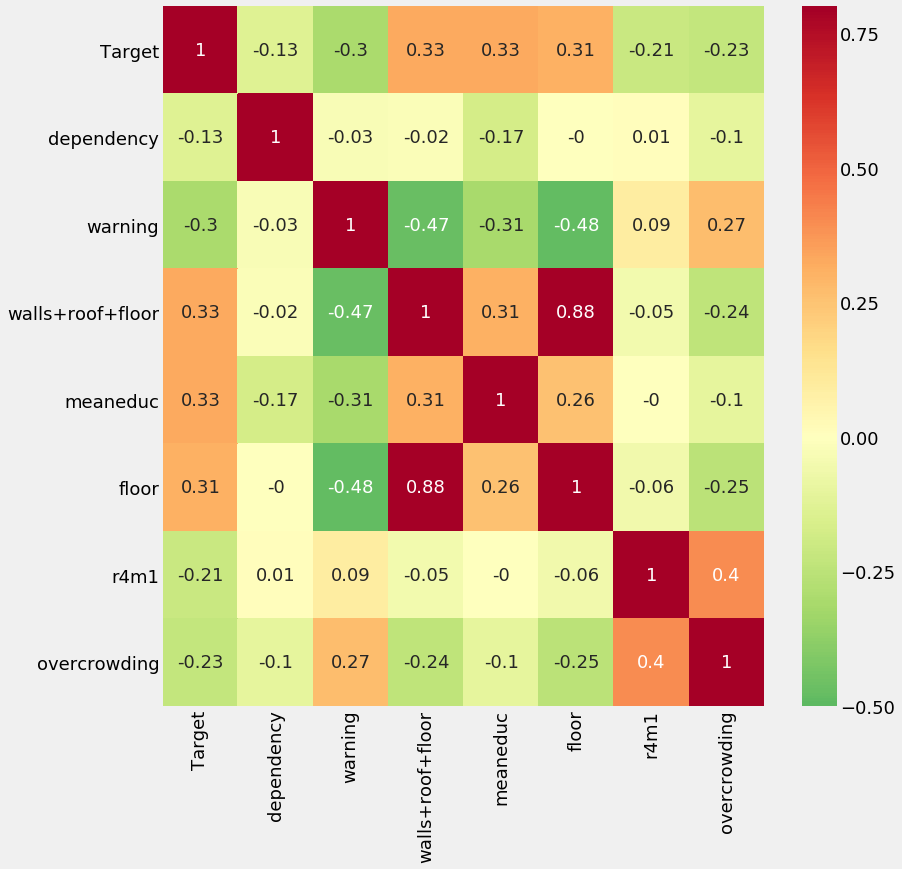

In [81]:
variables = ['Target', 'dependency', 'warning', 'walls+roof+floor', 'meaneduc',
             'floor', 'r4m1', 'overcrowding']

corr_mat = train_heads[variables].corr().round(2)

plt.rcParams['font.size']=18
plt.figure(figsize=(12,12))
sns.heatmap(corr_mat, vmin = -0.5, vmax = 0.8, center = 0, 
            cmap = plt.cm.RdYlGn_r, annot = True);

floor 나 walls+roof+floor 변수같은 경우 Target변수와 상관관계가 높은것을 확인할 수 있다. <br>
하지만 여기에는 다중공선성(collinearity) 문제가 있음.

#### Features Plot
exploration 의 마지막 단계로, Target과 가장 상관관계가 높은 변수에 대한 plot을 만들어 보겠다. <br>
상단 삼각형에는 scatterplots를 그리고, 대각선(diagonal)에는 kernel density plot을 그리고, 하단 삼각형에는 2D KDE plot을 그려보겠다.

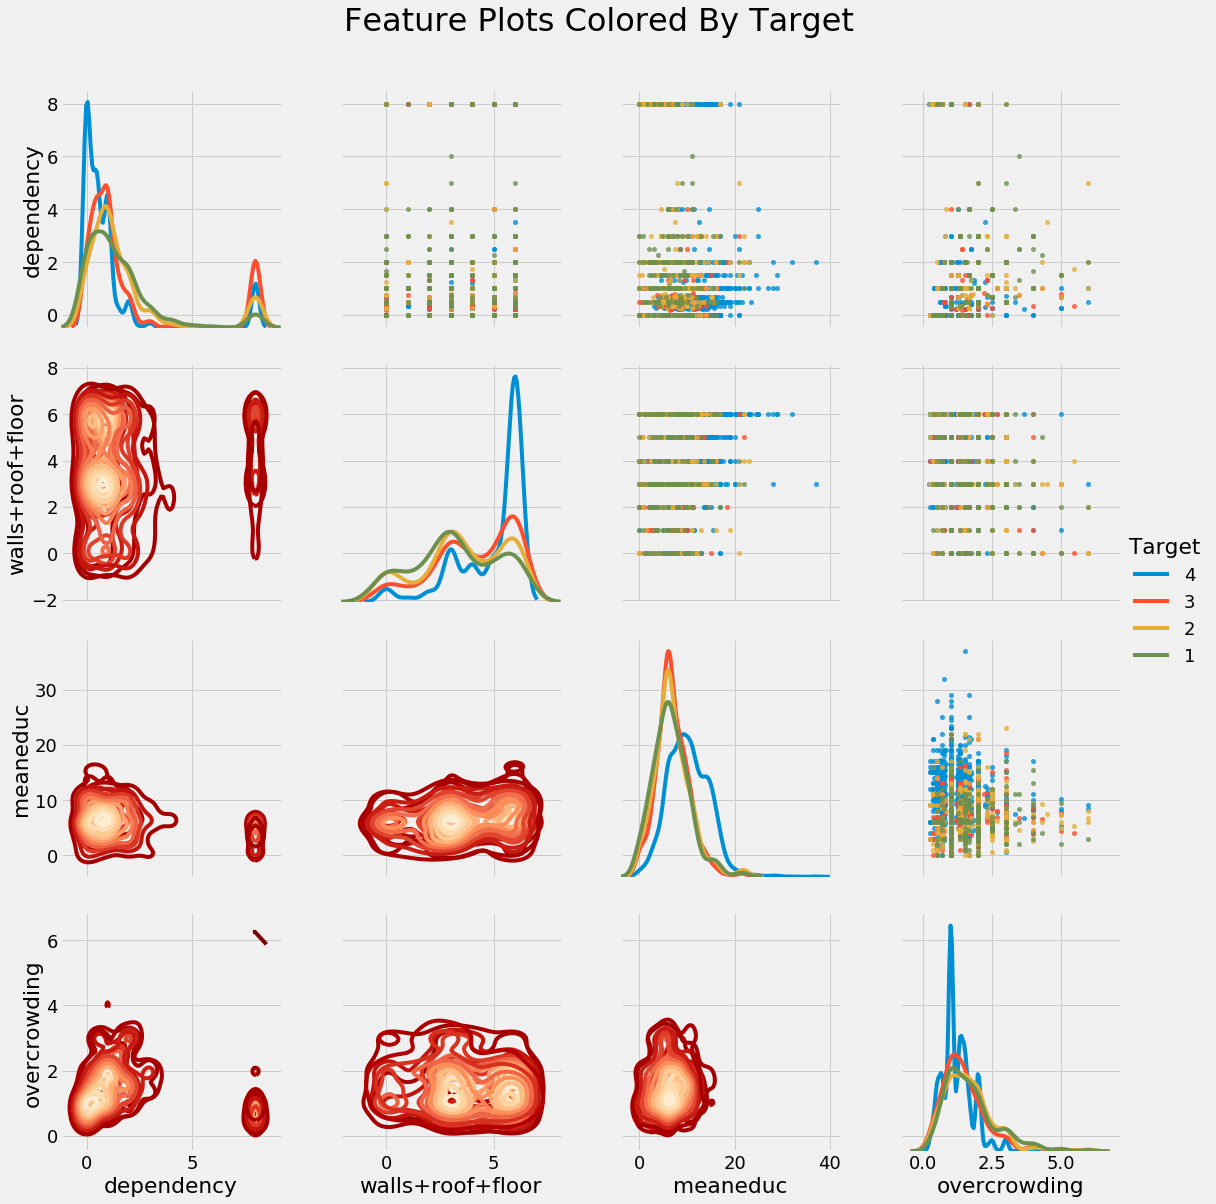

In [82]:
import warnings
warnings.filterwarnings('ignore')

# Copy the data for plotting
plot_data = train_heads[['Target', 'dependency', 'walls+roof+floor',
                         'meaneduc', 'overcrowding']]

# Create the pairgrid object
### Target컬럼은 vars에서 제외 
grid = sns.PairGrid(data = plot_data, size = 4, diag_sharey=False,
                    hue = 'Target', hue_order = [4, 3, 2, 1], 
                    vars = [x for x in list(plot_data.columns) if x != 'Target'])

# Upper is a scatter plot
grid.map_upper(plt.scatter, alpha = 0.8, s = 20)

# Diagonal is a histogram
grid.map_diag(sns.kdeplot)

# Bottom is density plot
grid.map_lower(sns.kdeplot, cmap = plt.cm.OrRd_r);
grid = grid.add_legend()
plt.suptitle('Feature Plots Colored By Target', size = 32, y = 1.05);

이제 feature engineering은 여기쯤에서 두고, 나중에 model performance확인 후에 다시 이 step으로 돌아올 것.

In [83]:
household_feats = list(heads.columns)

In [84]:
household_feats

['Id',
 'idhogar',
 'Target',
 'hacdor',
 'hacapo',
 'v14a',
 'refrig',
 'paredblolad',
 'paredzocalo',
 'paredpreb',
 'pisocemento',
 'pareddes',
 'paredmad',
 'paredzinc',
 'paredfibras',
 'paredother',
 'pisomoscer',
 'pisoother',
 'pisonatur',
 'pisonotiene',
 'pisomadera',
 'techozinc',
 'techoentrepiso',
 'techocane',
 'techootro',
 'cielorazo',
 'abastaguadentro',
 'abastaguafuera',
 'abastaguano',
 'sanitario1',
 'sanitario2',
 'sanitario3',
 'sanitario5',
 'sanitario6',
 'energcocinar1',
 'energcocinar2',
 'energcocinar3',
 'energcocinar4',
 'elimbasu1',
 'elimbasu2',
 'elimbasu3',
 'elimbasu4',
 'elimbasu5',
 'elimbasu6',
 'tipovivi1',
 'tipovivi2',
 'tipovivi3',
 'tipovivi4',
 'tipovivi5',
 'computer',
 'television',
 'lugar1',
 'lugar2',
 'lugar3',
 'lugar4',
 'lugar5',
 'lugar6',
 'area1',
 'v2a1-missing',
 'v2a1',
 'dependency',
 'edjefe',
 'edjefa',
 'meaneduc',
 'overcrowding',
 'rooms',
 'r4h1',
 'r4h2',
 'r4h3',
 'r4m1',
 'r4m2',
 'r4m3',
 'r4t1',
 'r4t2',
 'v18q1',
 

--------------------------------------------------------------------
## Individual Level Variables
individual level 변수에는 두가지 타입이 있다. 1과0 또는 True False로 나뉘는 Boolean 형태와  순서형(ordinal) 이다.

In [85]:
data.shape

(33413, 136)

In [86]:
# 0,1 또는 True,False값만 갖는 boolean 컬럼과 순서형 값을 갖는 ordinal 컬럼과 id형태의 컬럼만 추출
ind = data[id_ + ind_bool + ind_ordered]
ind.shape

(33413, 40)

## Redundant Individual Variables
household level variable에서 처럼 불필요한 변수들을 탐색해보겠다 <br>
변수 간 상관계수가 0.95 보다 큰것에 집중

In [87]:
# Create correlation matrix
corr_matrix = ind.corr()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.95
### 상관계수의 절대값이 하나라도 0.95가 넘는게 있으면 True
to_drop = [column for column in upper.columns if any(abs(upper[column]) > 0.95)]

#### 위와 동일한 결과. for, if문을 풀어썼을 때
# to_drop = []
# for column in upper.columns:
#     if any(abs(upper[column]) > 0.95):
#         to_drop.append(column)

to_drop

['female']

male과 female은 상관계수가 -1로 정반대임을 알 수 있다. 그러므로, male컬럼 제거

In [88]:
ind=ind.drop(columns='male')

#### Creating Ordinal Variables
우리는 갖고 있는 컬럼을 ordinal variable에 매핑할 수 있다. <br>
instlevel_ 변수에 주목해보자. 이 변수는 instlevel1 에서 instlevel9 까지 중에 교육의 양? 을말한다. <br>
* instlevel1 : no level of education
* instlevel9: postgraduate education.
ordinal 변수를 만들기 위해, 어떤 컬럼이 non-zero인지 확인해볼것이다. <br>
교육에는 고유의 순서 (높은것이 좋음) 이 있기 때문에 ordinal variable로의 변환은 일리가 있다. 

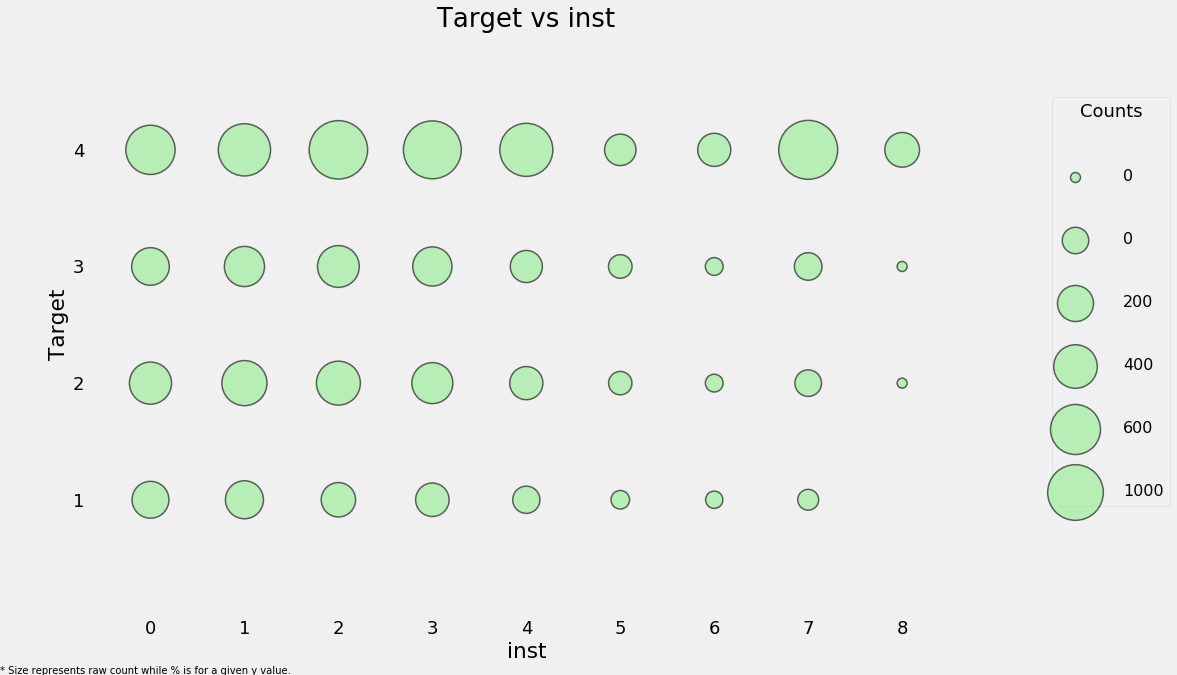

In [89]:
# instl로 시작하는 컬럼들 array값중에 행별로 최대값=1 이 위치한 인덱스 값
ind['inst'] = np.argmax(np.array(ind[[c for c in ind if c.startswith('instl')]]), axis = 1)
plot_categoricals('inst','Target', ind, annotate=False);

높은 수준의 교육을 받은 사람들일수록 가난하지 않다.<br>
이것은 individual level 이기 때문에 결과적으로 household level 에 통합해야 한다.

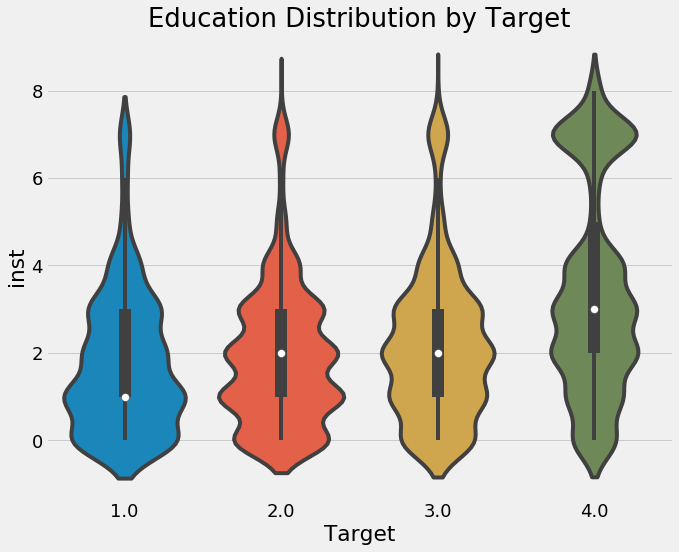

In [90]:
# ind데이터에서 'inst'컬럼은 교육수준 0~8값중 하나
plt.figure(figsize=(10,8))
sns.violinplot(x='Target', y='inst', data=ind);
plt.title('Education Distribution by Target');

In [91]:
ind.shape

(33413, 40)

In [92]:
# 교육 수준을 나타내는 컬럼들을 통합한 inst 컬럼을 만들었으니, instlevel1,2,3,,,8 컬럼은 제거
ind = ind.drop(columns=[c for c in ind if c.startswith('instlevel')])
ind.shape

(33413, 31)

#### Feature Construction
있는 데이터로 몇가지 새로운 feature를 만들 수 있다. 예를들어, yeras of schooling을 age로 나눌 수 있다.

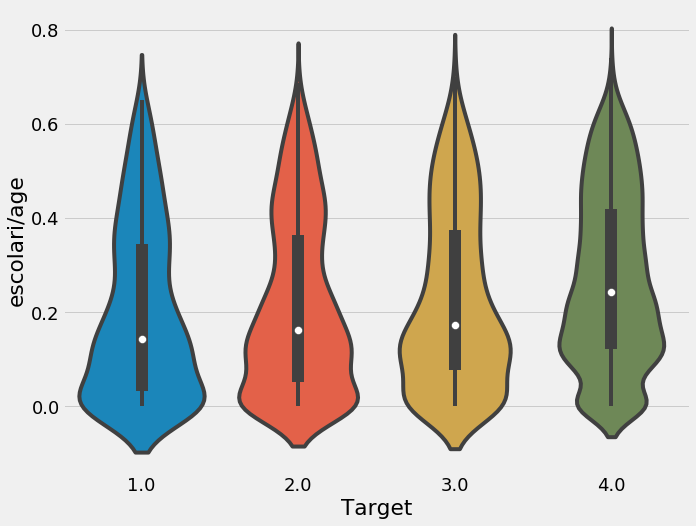

In [93]:
ind['escolari/age'] = ind['escolari'] / ind['age']

plt.figure(figsize=(10,8))
sns.violinplot('Target','escolari/age', data=ind)

새로운 변수 inst를 age로 나눠볼 수 있다. 우리는 이것을 tech라는 변수로 네이밍하겠다. <br>
이것은 태블릿과 모바일폰의 결합이다.

In [94]:
ind['inst/age'] = ind['inst'] / ind['age']
ind['tech'] = ind['v18q'] + ind['mobilephone']
ind['tech'].describe()

count    33413.000000
mean         1.214886
std          0.462567
min          0.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          2.000000
Name: tech, dtype: float64

### Feature Engineering through Aggregations
이제 우리는 각각의 household별로 종합을 해야 한다. 가장 간단한 방법은 idhogar로 groupby를 하고 데이터를 agg하는것이다. <br>
이 경우 우리는 ordered, continuous, boolean 데이터에 모두 같은 aggregation을 사용하고 필요없는 컬럼은 drop할것이다.

In [95]:
range_ = lambda x: x.max() - x.min()
range_.__name__ = 'range_'
ind_agg=ind.drop(columns='Target').groupby('idhogar').agg(['min','max','sum','count','std', range_])
ind_agg.head()

v18q                           dis                                 \
           min max sum count  std range_ min max sum count       std range_   
idhogar                                                                       
000a08204    1   1   3     3  0.0      0   0   0   0     3  0.000000      0   
000bce7c4    0   0   0     2  0.0      0   0   1   1     2  0.707107      1   
001845fb0    0   0   0     4  0.0      0   0   0   0     4  0.000000      0   
001ff74ca    1   1   2     2  0.0      0   0   0   0     2  0.000000      0   
003123ec2    0   0   0     4  0.0      0   0   0   0     4  0.000000      0   

          female                                estadocivil1                \
             min max sum count       std range_          min max sum count   
idhogar                                                                      
000a08204      0   1   1     3  0.577350      1            0   1   1     3   
000bce7c4      0   1   1     2  0.707107      1            0   0   0     2   
001845fb0      0   1   2     4  0.577350      1            0   0   0     4   
001ff74ca      1   1   2     2  0.000000      0            0   1   1     2   
003123ec2      0   1   1     4  0.500000      1            0   1   2     4   

                           estadocivil2                                \
                std range_          min max sum count      std range_   
idhogar                                                                 
000a08204  0.577350      1            0   1   2     3  0.57735      1   
000bce7c4  0.000000      0            0   0   0     2  0.00000      0   
001845fb0  0.000000      0            0   1   2     4  0.57735      1   
001ff74ca  0.707107      1            0   0   0     2  0.00000      0   
003123ec2  0.577350      1            0   1   2     4  0.57735      1   

          estadocivil3                           estadocivil4                \
                   min max sum count  std range_          min max sum count   
idhogar                                                                       
000a08204            0   0   0     3  0.0      0            0   0   0     3   
000bce7c4            1   1   2     2  0.0      0            0   0   0     2   
001845fb0            0   0   0     4  0.0      0            0   0   0     4   
001ff74ca            0   0   0     2  0.0      0            0   0   0     2   
003123ec2            0   0   0     4  0.0      0            0   0   0     4   

                      estadocivil5                                 \
           std range_          min max sum count       std range_   
idhogar                                                             
000a08204  0.0      0            0   0   0     3  0.000000      0   
000bce7c4  0.0      0            0   0   0     2  0.000000      0   
001845fb0  0.0      0            0   0   0     4  0.000000      0   
001ff74ca  0.0      0            0   1   1     2  0.707107      1   
003123ec2  0.0      0            0   0   0     4  0.000000      0   

          estadocivil6                           estadocivil7                \
                   min max sum count  std range_          min max sum count   
idhogar                                                                       
000a08204            0   0   0     3  0.0      0            0   0   0     3   
000bce7c4            0   0   0     2  0.0      0            0   0   0     2   
001845fb0            0   0   0     4  0.0      0            0   1   2     4   
001ff74ca            0   0   0     2  0.0      0            0   0   0     2   
003123ec2            0   0   0     4  0.0      0            0   0   0     4   

                          parentesco1                                 \
               std range_         min max sum count       std range_   
idhogar                                                                
000a08204  0.00000      0           0   1   1     3  0.577350      1   
000bce7c4  0.00000      0           0   1   1     2  0.70710

위의 faeture들을 추가하는 순간, feature 가 30개에서 180개로 늘었다. 다음으로, 우리는 컬럼의 이름을 바꿔줄것이다.

In [96]:
new_col=[]
for c in ind_agg.columns.levels[0]:
    for stat in ind_agg.columns.levels[1]:
        new_col.append(f'{c}-{stat}')
ind_agg.columns = new_col
ind_agg.head()

,v18q-min,v18q-max,v18q-sum,v18q-count,v18q-std,v18q-range_,dis-min,dis-max,dis-sum,dis-count,dis-std,dis-range_,female-min,female-max,female-sum,female-count,female-std,female-range_,estadocivil1-min,estadocivil1-max,estadocivil1-sum,estadocivil1-count,estadocivil1-std,estadocivil1-range_,estadocivil2-min,estadocivil2-max,estadocivil2-sum,estadocivil2-count,estadocivil2-std,estadocivil2-range_,estadocivil3-min,estadocivil3-max,estadocivil3-sum,estadocivil3-count,estadocivil3-std,estadocivil3-range_,estadocivil4-min,estadocivil4-max,estadocivil4-sum,estadocivil4-count,estadocivil4-std,estadocivil4-range_,estadocivil5-min,estadocivil5-max,estadocivil5-sum,estadocivil5-count,estadocivil5-std,estadocivil5-range_,estadocivil6-min,estadocivil6-max,estadocivil6-sum,estadocivil6-count,estadocivil6-std,estadocivil6-range_,estadocivil7-min,estadocivil7-max,estadocivil7-sum,estadocivil7-count,estadocivil7-std,estadocivil7-range_,parentesco1-min,parentesco1-max,parentesco1-sum,parentesco1-count,parentesco1-std,parentesco1-range_,parentesco2-min,parentesco2-max,parentesco2-sum,parentesco2-count,parentesco2-std,parentesco2-range_,parentesco3-min,parentesco3-max,parentesco3-sum,...,parentesco8-count,parentesco8-std,parentesco8-range_,parentesco9-min,parentesco9-max,parentesco9-sum,parentesco9-count,parentesco9-std,parentesco9-range_,parentesco10-min,parentesco10-max,parentesco10-sum,parentesco10-count,parentesco10-std,parentesco10-range_,parentesco11-min,parentesco11-max,parentesco11-sum,parentesco11-count,parentesco11-std,parentesco11-range_,parentesco12-min,parentesco12-max,parentesco12-sum,parentesco12-count,parentesco12-std,parentesco12-range_,mobilephone-min,mobilephone-max,mobilephone-sum,mobilephone-count,mobilephone-std,mobilephone-range_,rez_esc-min,rez_esc-max,rez_esc-sum,rez_esc-count,rez_esc-std,rez_esc-range_,escolari-min,escolari-max,escolari-sum,escolari-count,escolari-std,escolari-range_,age-min,age-max,age-sum,age-count,age-std,age-range_,inst-min,inst-max,inst-sum,inst-count,inst-std,inst-range_,escolari/age-min,escolari/age-max,escolari/age-sum,escolari/age-count,escolari/age-std,escolari/age-range_,inst/age-min,inst/age-max,inst/age-sum,inst/age-count,inst/age-std,inst/age-range_,tech-min,tech-max,tech-sum,tech-count,tech-std,tech-range_
idhogar,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
000a08204,1,1,3,3,0.0,0,0,0,0,3,0.000000,0,0,1,1,3,0.577350,1,0,1,1,3,0.577350,1,0,1,2,3,0.57735,1,0,0,0,3,0.0,0,0,0,0,3,0.0,0,0,0,0,3,0.000000,0,0,0,0,3,0.0,0,0,0,0,3,0.00000,0,0,1,1,3,0.577350,1,0,1,1,3,0.577350,1,0,1,1,...,3,0.0,0,0,0,0,3,0.0,0,0,0,0,3,0.0,0,0,0,0,3,0.0,0,0,0,0,3,0.0,0,1,1,3,3,0.0,0,0.0,0.0,0.0,3,0.0,0.0,0,14,26,3,7.571878,14,4,30,62,3,14.468356,26,0,7,14,3,4.041452,7,0.000000,0.500000,0.900000,3,0.264575,0.500000,0.000000,0.250000,0.483333,3,0.139775,0.250000,2,2,6,3,0.0,0
000bce7c4,0,0,0,2,0.0,0,0,1,1,2,0.707107,1,0,1,1,2,0.707107,1,0,0,0,2,0.000000,0,0,0,0,2,0.00000,0,1,1,2,2,0.0,0,0,0,0,2,0.0,0,0,0,0,2,0.000000,0,0,0,0,2,0.0,0,0,0,0,2,0.00000,0,0,1,1,2,0.707107,1,0,1,1,2,0.707107,1,0,0,0,...,2,0.0,0,0,0,0,2,0.0,0,0,0,0,2,0.0,0,0,0,0,2,0.0,0,0,0,0,2,0.0,0,1,1,2,2,0.0,0,0.0,0.0,0.0,2,0.0,0.0,0,5,5,2,3.535534,5,60,63,123,2,2.121320,3,0,1,1,2,0.707107,1,0.000000,0.083333,0.083333,2,0.058926,0.083333,0.000000,0.016667,0.016667,2,0.011785,0.016667,1,1,2,2,0.0,0
001845fb0,0,0,0,4,0.0,0,0,0,0,4,0.000000,0,0,1,2,4,0.577350,1,0,0,0,4,0.000000,0,0,1,2,4,0.57735,1,0,0,0,4,0.0,0,0,0,0,4,0.0,0,0,0,0,4,0.000000,0,0,0,0,4,0.0,0,0,1,2,4,0.57735,1,0,1,1,4,0.500000,1,0,1,1,4,0.500000,1,0,1,2,...,4,0.0,0,0,0,0,4,0.0,0,0,0,0,4,0.0,0,0,0,0,4,0.0,0,0,0,0,4,0.0,0,1,1,4,4,0.0,0,0.0,0.0,0.0,3,0.0,0.0,6,14,41,4,3.304038,8,19,52,142,4,16.421531,33,2,7,16,4,2.160247,5,0.115385,0.526316,1.397906,4,0.183106,0.410931,0.038462,0.166667,0.511959,4,0.060123,0.128205,1,1,4,4,0.0,0
001ff74ca,1,1,2,2,0.0,0,0,0,0,2,0.000000,0,1,1,2,2,0.000000,0,0

In [97]:
ind_agg.iloc[:, [0,1,2,3,6,7,8,9]].head()

,v18q-min,v18q-max,v18q-sum,v18q-count,dis-min,dis-max,dis-sum,dis-count
idhogar,,,,,,,,
000a08204,1,1,3,3,0,0,0,3
000bce7c4,0,0,0,2,0,1,1,2
001845fb0,0,0,0,4,0,0,0,4
001ff74ca,1,1,2,2,0,0,0,2
003123ec2,0,0,0,4,0,0,0,4


#### Feature Selection
변수간에 상관이 0.95보다 큰 짝중 하나는 제거할 것이다.

In [98]:
corr_matrix = ind_agg.corr()   

# 180 x 180 행렬을 1로 모두 채운 후 (np.ones), 위쪽상단 삼각형만 값 1로채우고 나머지는 0 (np.triu), 실제 행렬값에 적용하기 위해 True,False형태로 바꿔줌
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))   # 뒤에 bool타입으로 바꿔줘야 함

to_drop = [column for column in upper.columns if any(abs(upper[column]) > 0.95)]  # (abs(upper['female-count'])>0.5)는 True False값 반환

print(f'There are {len(to_drop)} correlated columns to remove.')

There are 85 correlated columns to remove.


In [99]:
# any함수는 True가 하나라도 있으면 True산출
any(abs(upper['female-count'])>0.5)

True

우리는 불필요한 컬럼은 drop하고, heads 데이터와 merge해서 최종 데이터프레임을 만들것이다.

In [100]:
ind_agg = ind_agg.drop(columns=to_drop)
ind_feats = list(ind_agg.columns)

# Merge on the household id
final = heads.merge(ind_agg, on='idhogar', how='left')

print('Final features shape:', final.shape)

Final features shape: (10307, 190)


In [101]:
final.head()

,Id,idhogar,Target,hacdor,hacapo,v14a,refrig,paredblolad,paredzocalo,paredpreb,pisocemento,pareddes,paredmad,paredzinc,paredfibras,paredother,pisomoscer,pisoother,pisonatur,pisonotiene,pisomadera,techozinc,techoentrepiso,techocane,techootro,cielorazo,abastaguadentro,abastaguafuera,abastaguano,sanitario1,sanitario2,sanitario3,sanitario5,sanitario6,energcocinar1,energcocinar2,energcocinar3,energcocinar4,elimbasu1,elimbasu2,elimbasu3,elimbasu4,elimbasu5,elimbasu6,tipovivi1,tipovivi2,tipovivi3,tipovivi4,tipovivi5,computer,television,lugar1,lugar2,lugar3,lugar4,lugar5,lugar6,area1,v2a1-missing,v2a1,dependency,edjefe,edjefa,meaneduc,overcrowding,rooms,r4h1,r4h2,r4h3,r4m1,r4m2,r4m3,r4t1,r4t2,v18q1,...,estadocivil3-max,estadocivil3-std,estadocivil4-min,estadocivil4-max,estadocivil5-min,estadocivil5-max,estadocivil5-sum,estadocivil6-min,estadocivil6-max,estadocivil7-min,estadocivil7-max,estadocivil7-sum,estadocivil7-std,parentesco1-min,parentesco1-max,parentesco1-std,parentesco2-min,parentesco2-max,parentesco2-std,parentesco3-min,parentesco3-max,parentesco3-sum,parentesco4-min,parentesco4-max,parentesco4-sum,parentesco5-min,parentesco5-max,parentesco6-min,parentesco6-max,parentesco6-sum,parentesco7-min,parentesco7-max,parentesco8-min,parentesco8-max,parentesco9-min,parentesco9-max,parentesco9-sum,parentesco10-min,parentesco10-max,parentesco11-min,parentesco11-max,parentesco11-sum,parentesco12-min,parentesco12-max,parentesco12-sum,mobilephone-min,mobilephone-std,mobilephone-range_,rez_esc-min,rez_esc-max,escolari-min,escolari-max,escolari-sum,escolari-std,escolari-range_,age-min,age-max,age-sum,age-std,age-range_,inst-max,inst-std,inst-range_,escolari/age-min,escolari/age-max,escolari/age-sum,escolari/age-std,escolari/age-range_,inst/age-max,inst/age-std,inst/age-range_,tech-min,tech-sum,tech-std,tech-range_
0,ID_279628684,21eb7fcc1,4.0,0,0,1,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,False,190000.0,0.0,10.0,0.0,10.0,1.000000,3,0,1,1,0,0,0,0,1,0.0,...,0,NaN,1,1,0,0,0,0,0,0,0,0,NaN,1,1,NaN,0,0,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,NaN,0,0.0,0.0,10,10,10,NaN,0,43,43,43,NaN,0,3,NaN,0,0.232558,0.232558,0.232558,NaN,0.000000,0.069767,NaN,0.000000,1,1,NaN,0
1,ID_f29eb3ddd,0e5d7a658,4.0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,1,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,False,135000.0,8.0,12.0,0.0,12.0,1.000000,4,0,1,1,0,0,0,0,1,1.0,...,0,NaN,1,1,0,0,0,0,0,0,0,0,NaN,1,1,NaN,0,0,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,NaN,0,0.0,0.0,12,12,12,NaN,0,67,67,67,NaN,0,7,NaN,0,0.179104,0.179104,0.179104,NaN,0.000000,0.104478,NaN,0.000000,2,2,NaN,0
2,ID_68de51c94,2c7317ea8,4.0,0,0,1,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,False,0.0,8.0,0.0,11.0,11.0,0.500000,8,0,0,0,0,1,1,0,1,0.0,...,0,NaN,0,0,0,0,0,1,1,0,0,0,NaN,1,1,NaN,0,0,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,0.0,0.0,11,11,11,NaN,0,92,92,92,NaN,0,4,NaN,0,0.119565,0.119565,0.119565,NaN,0.000000,0.043478,NaN,0.000000,0,0,NaN,0
3,ID_ec05b1a7b,2b58d945f,4.0,0,0,1,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,False,180000.0,1.0,11.0,0.0,11.0,1.333333,5,0,2,2,1,1,2,1,3,1.0,...,0,0.0,0,0,0,0,0,0,0,0,1,1,0.5,0,1,0.5,0,1,0.5,0,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0.0,0,0.0,1.0,2,11,33,4.272002,9,8,38,100,14.899664,30,4,1.414214,3,0.250000,0.529412,1.366183,0.126943,0.279412,0.176471,0.033010,0.071207,2,8,0.0,0
4,ID_1284f8aad,d6dae86b7,4.0,1,0,1,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,False,130000.0,1.0,9.0,0.0,10.0,4.000000,2,0,1,1,2,1,3,2,2,0.0,...,0,0.0,0,0,0,0,0,0,0,0,1,1,0.5,0,1,0.5,0,1,0.5,0,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0.0,0,0.0,1.0,0,11,23,5.123475,11,7,30,76,11.690452,23,4,1.825742,4,0.000000,0.392857,0.965584,0.168946,0.392857,0.1428

(질문) : feature들의 min, max, sum 값 각각이 feature로서 의미가있나 ?

#### Final Data Exploration

In [102]:
# Target컬럼과의 상관관계
corrs = final.corr()['Target']

In [103]:
corrs.sort_values().head()

warning            -0.301791
hogar_nin          -0.266309
r4t1               -0.260917
estadocivil1-sum   -0.239130
overcrowding       -0.234954
Name: Target, dtype: float64

In [104]:
corrs.sort_values().dropna().tail()

walls+roof+floor    0.332446
meaneduc            0.333652
inst-max            0.368229
escolari-max        0.373091
Target              1.000000
Name: Target, dtype: float64

우리가 만든 몇몇 variable이 Target과 상당히 연관이 있다는것을 알 수 있다. 이 변수들이 실제로 유용한지는 모델링 단계에서 결정될수있다.

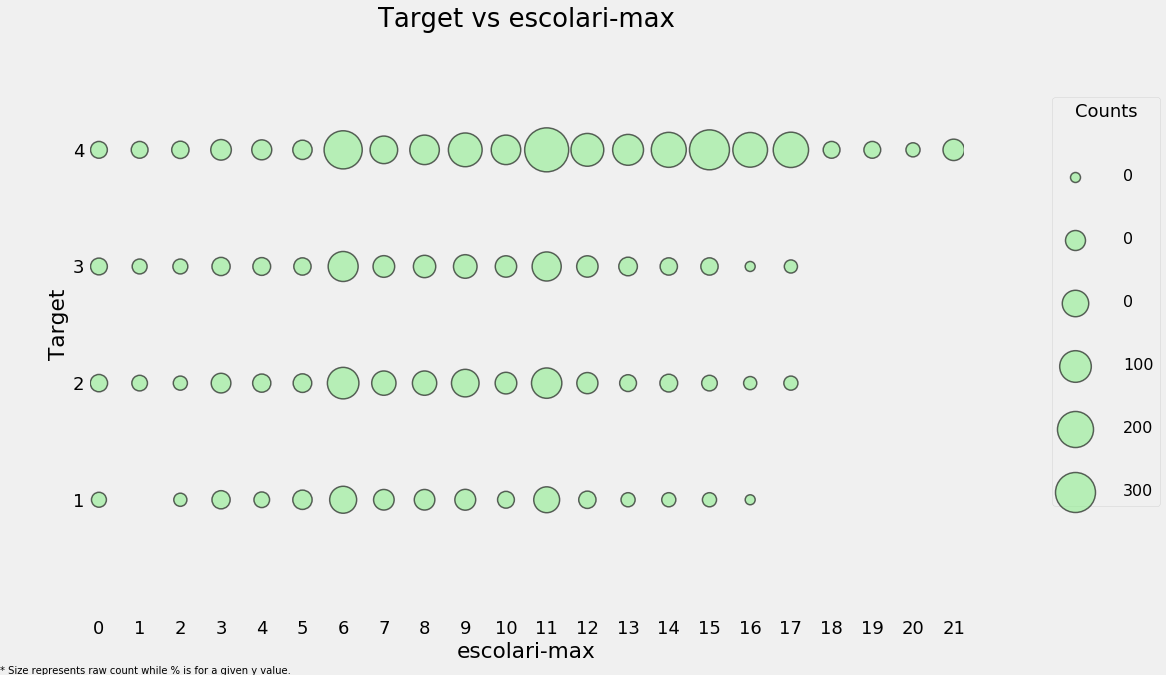

In [105]:
plot_categoricals('escolari-max', 'Target', final, annotate=False);

Text(0.5, 1.0, 'Max Schooling by Target')

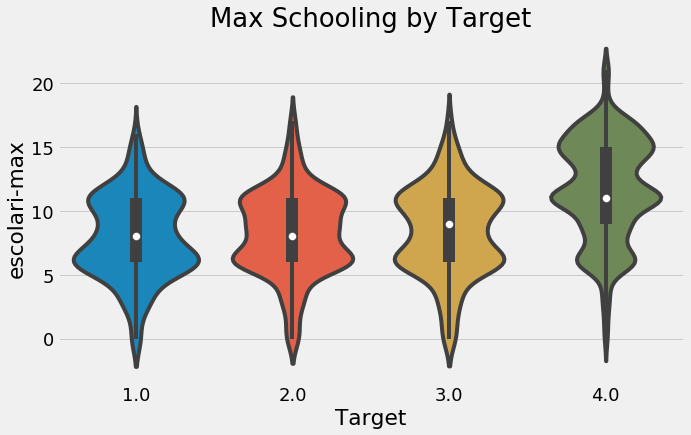

In [106]:
plt.figure(figsize=(10,6))
sns.violinplot(x='Target', y='escolari-max', data=final);
plt.title('Max Schooling by Target')

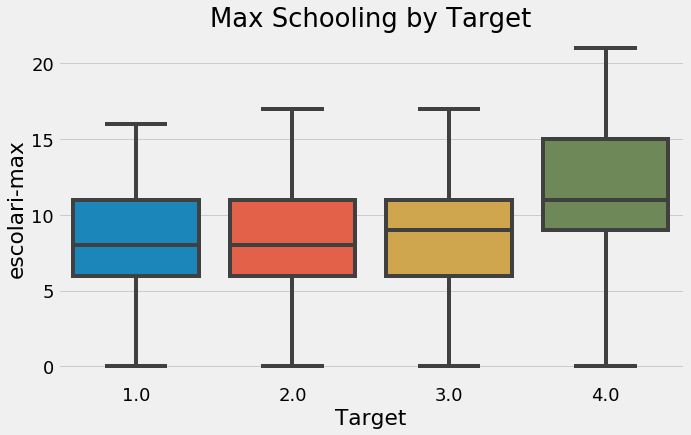

In [107]:
plt.figure(figsize = (10, 6))
sns.boxplot(x = 'Target', y = 'escolari-max', data = final);
plt.title('Max Schooling by Target');

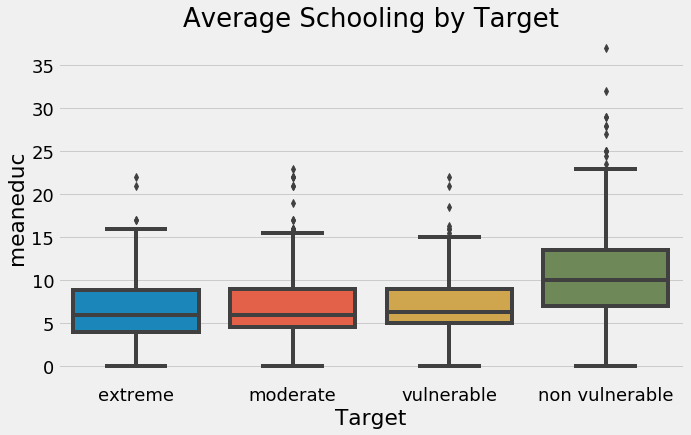

In [108]:
plt.figure(figsize = (10, 6))
sns.boxplot(x = 'Target', y = 'meaneduc', data = final);
# x축 설정한 값으로 바꾸기
plt.xticks([0, 1, 2, 3], poverty_mapping.values())
plt.title('Average Schooling by Target');

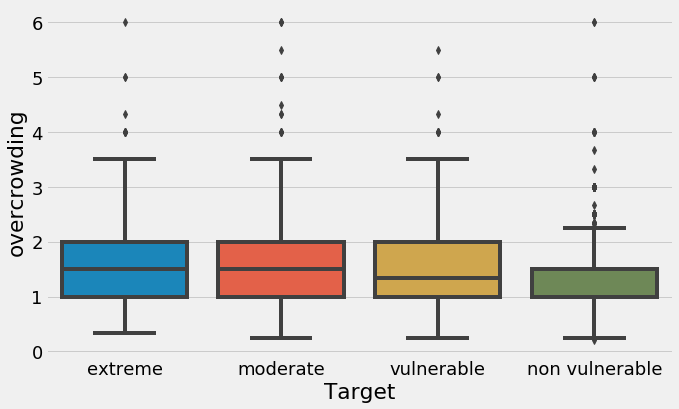

In [109]:
plt.figure(figsize=(10,6))
sns.boxplot(x='Target',y='overcrowding', data=final)
plt.xticks([0,1,2,3], poverty_mapping.values())
plt.show()

또다른 유용할수도 있는 feature는 head of household의 성별이다. 우리가 데이터를 통합했기 때문에, <br>
individual level data로 돌아가서 head of household의 성별을 찾아야 한다.

In [110]:
# head of household 가 1인 idhogar컬럼과 femael컬럼가져오기
head_gender = ind.loc[ind['parentesco1'] == 1, ['idhogar', 'female']]
final = final.merge(head_gender, on = 'idhogar', how = 'left').rename(columns = {'female': 'female-head'})

In [111]:
final.groupby('female-head')['Target'].value_counts(normalize=True)

female-head  Target
0            4.0       0.682873
             2.0       0.136464
             3.0       0.123204
             1.0       0.057459
1            4.0       0.617369
             2.0       0.167670
             3.0       0.113500
             1.0       0.101462
Name: Target, dtype: float64

가장이 여자일 경우, 가난할 가능성이 높다..

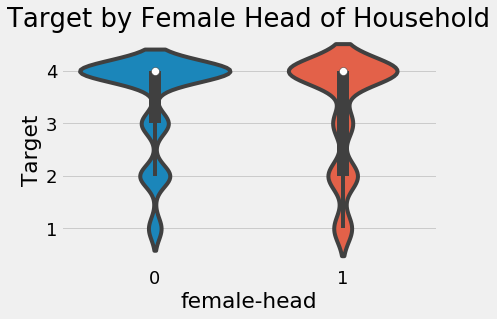

In [112]:
sns.violinplot(x = 'female-head', y = 'Target', data = final);
plt.title('Target by Female Head of Household');

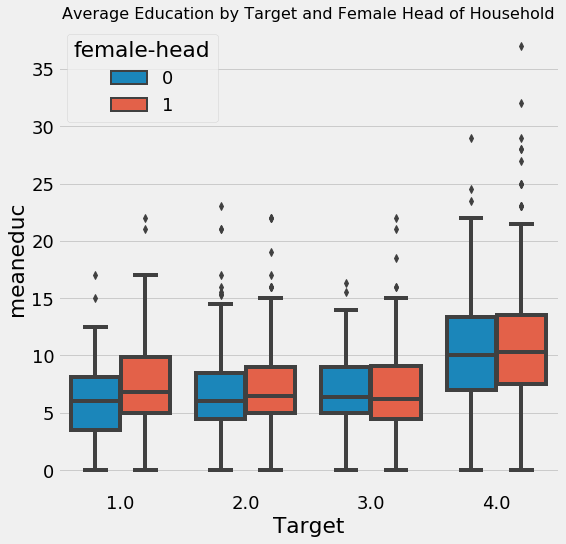

In [113]:
plt.figure(figsize = (8, 8))
sns.boxplot(x = 'Target', y = 'meaneduc', hue = 'female-head', data = final);
plt.title('Average Education by Target and Female Head of Household', size = 16);

Target의 모든 값에서 여자가 가장인 가정이 교육수준이 더 높은것으로 보인다. <br>
하지만 전반적으로 본것과 같이 여자가 가장일 경우 가난할 경우가 더 많다.

In [114]:
final.groupby('female-head')['meaneduc'].agg(['mean', 'count'])

,mean,count
female-head,,
0,8.968025,6384
1,9.237013,3903


----------------------------------------------------------------------------------------------------------------
## Machine Learning Modeling
* Random Forest Classifier 사용
* 10-fold cross validation
* fold사이에 스코어가 얼마나 변했는지를 보기 위해 F1 Macro 를 사용할 것이다.

In [115]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, make_scorer
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import Imputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline

# Custom scorer for cross validation
scorer = make_scorer(f1_score, greater_is_better=True, average = 'macro')

In [116]:
# Labels for training
### null이 아닌 Target값들을 uint8 형태로 변환후 array로 변환
train_labels = np.array(list(final[final['Target'].notnull()]['Target'].astype(np.uint8)))

# Extract the training data
train_set = final[final['Target'].notnull()].drop(columns = ['Id', 'idhogar', 'Target'])
test_set = final[final['Target'].isnull()].drop(columns = ['Id', 'idhogar', 'Target'])

# Submission base which is used for making submissions to the competition
submission_base = test[['Id', 'idhogar']].copy()

우리는 서로 다른 모델들을 비교할것이기 때문에, feature를 scale할것이다. (각 컬럼을 0과 1 사이로 제한) <br>
많은 앙상블 모델에서, KNearest Neighbors 또는 Support Vector Machine과 같은 distance metric에서 feature scaling은 필수적이다. <br>
또한 missing value를 feature의 median 값으로 대체할것이다. <br>

In [117]:
features = list(train_set.columns)

pipeline = Pipeline([('imputer', Imputer(strategy = 'median')), 
                      ('scaler', MinMaxScaler())])

# Fit and transform training data
train_set = pipeline.fit_transform(train_set)
test_set = pipeline.transform(test_set)

/Users/suhyun/anaconda3/envs/suhyun/lib/python3.7/site-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [118]:
model = RandomForestClassifier(n_estimators=100, random_state=10, 
                               n_jobs = -1)
# 10 fold cross validation
cv_score = cross_val_score(model, train_set, train_labels, cv = 10, scoring = scorer)

print(f'10 Fold Cross Validation F1 Score = {round(cv_score.mean(), 4)} with std = {round(cv_score.std(), 4)}')

10 Fold Cross Validation F1 Score = 0.3375 with std = 0.0421


### Feature Importances

In [119]:
model.fit(train_set, train_labels)

# Feature importances into a dataframe
feature_importances = pd.DataFrame({'feature': features, 'importance': model.feature_importances_})
feature_importances.head()

,feature,importance
0,hacdor,0.000793
1,hacapo,0.000479
2,v14a,0.000403
3,refrig,0.001412
4,paredblolad,0.006185


In [120]:
def plot_feature_importances(df, n = 10, threshold = None):
    """Plots n most important features. Also plots the cumulative importance if
    threshold is specified and prints the number of features needed to reach threshold cumulative importance.
    Intended for use with any tree-based feature importances. 
    
    Args:
        df (dataframe): Dataframe of feature importances. Columns must be "feature" and "importance".
    
        n (int): Number of most important features to plot. Default is 15.
    
        threshold (float): Threshold for cumulative importance plot. If not provided, no plot is made. Default is None.
        
    Returns:
        df (dataframe): Dataframe ordered by feature importances with a normalized column (sums to 1) 
                        and a cumulative importance column
    
    Note:
    
        * Normalization in this case means sums to 1. 
        * Cumulative importance is calculated by summing features from most to least important
        * A threshold of 0.9 will show the most important features needed to reach 90% of cumulative importance
    
    """
    plt.style.use('fivethirtyeight')
    
    # Sort features with most important at the head
    df = df.sort_values('importance', ascending = False).reset_index(drop = True)
    
    # Normalize the feature importances to add up to one and calculate cumulative importance
    df['importance_normalized'] = df['importance'] / df['importance'].sum()
    df['cumulative_importance'] = np.cumsum(df['importance_normalized'])
    
    plt.rcParams['font.size'] = 12
    
    # Bar plot of n most important features
    df.loc[:n, :].plot.barh(y = 'importance_normalized', 
                            x = 'feature', color = 'darkgreen', 
                            edgecolor = 'k', figsize = (12, 8),
                            legend = False, linewidth = 2)

    plt.xlabel('Normalized Importance', size = 18); plt.ylabel(''); 
    plt.title(f'{n} Most Important Features', size = 18)
    plt.gca().invert_yaxis()
    
    
    if threshold:
        # Cumulative importance plot
        plt.figure(figsize = (8, 6))
        plt.plot(list(range(len(df))), df['cumulative_importance'], 'b-')
        plt.xlabel('Number of Features', size = 16); plt.ylabel('Cumulative Importance', size = 16); 
        plt.title('Cumulative Feature Importance', size = 18);
        
        # Number of features needed for threshold cumulative importance
        # This is the index (will need to add 1 for the actual number)
        importance_index = np.min(np.where(df['cumulative_importance'] > threshold))
        
        # Add vertical line to plot
        plt.vlines(importance_index + 1, ymin = 0, ymax = 1.05, linestyles = '--', colors = 'red')
        plt.show();
        
        print('{} features required for {:.0f}% of cumulative importance.'.format(importance_index + 1, 
                                                                                  100 * threshold))
    
    return df

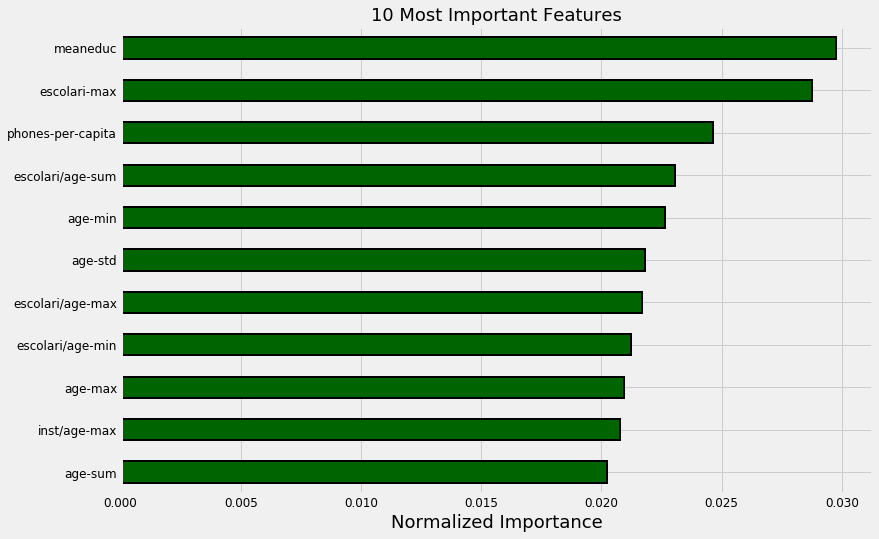

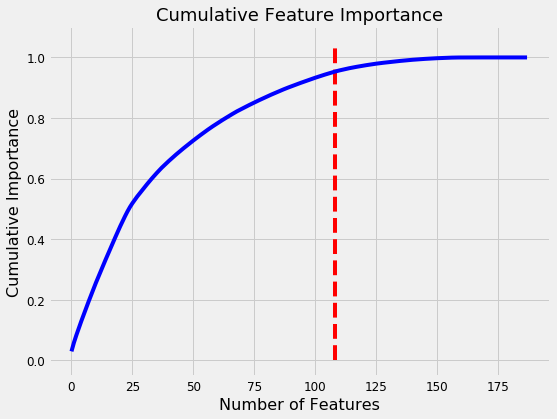

108 features required for 95% of cumulative importance.


In [121]:
norm_fi = plot_feature_importances(feature_importances, threshold=0.95)

90%의 중요도를 위해서는 108개의 feature만있으면 된다는 의미이므로, <br>
몇몇의 다른 feature들은 제거해도 된다는 것을 말한다.

In [146]:
def kde_target(df, variable):
    colors={1:'red', 2:'orange', 3:'blue', 4:'green'}
    
    plt.figure(figsize=(12,8))
    df = df[df['Target'].notnull()]   # Target값이 null이 아닌것만
    
    for level in df['Target'].unique():   # level은 1,2,3,4중 하나
        subset = df[df['Target'] == level].copy()
        sns.kdeplot(subset[variable].dropna(), 
                    label = f'Poverty Level: {level}', 
                    color = colors[int(subset['Target'].unique())])

    plt.xlabel(variable); plt.ylabel('Density');
    plt.title('{} Distribution'.format(variable.capitalize()));

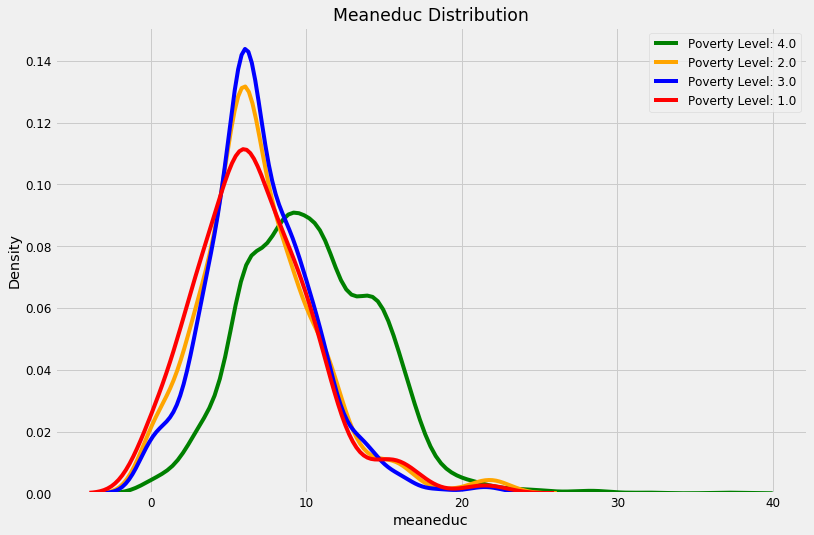

In [147]:
kde_target(final, 'meaneduc')

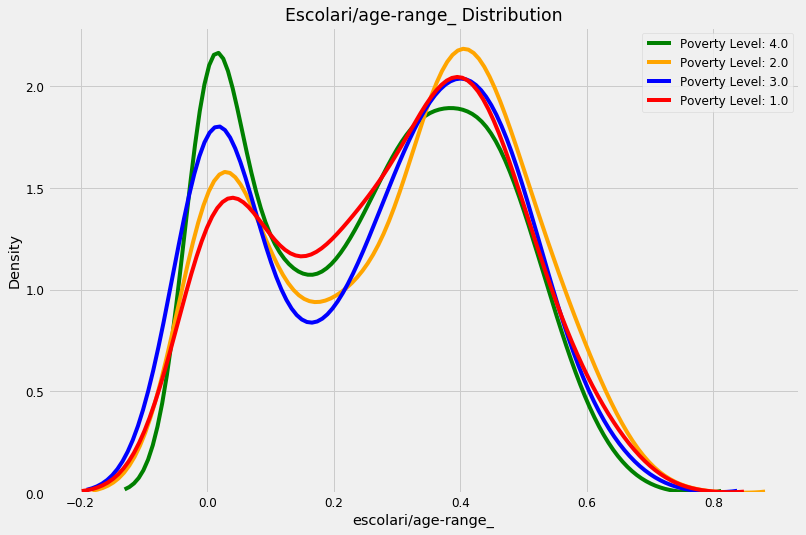

In [148]:
kde_target(final, 'escolari/age-range_')

### Model Selection
대부분 사람들이 gradient boosting machine을 사용한다. 그러나 우리는 몇몇의 다른 모델들도 사용해볼것이다. <br>
우리가 할것은 모델을 평가할 함수를 작성하는 것이다. <br>
Random Forest Classifier에서 8개의 다른 Scikit-Learn모델을 시도할것이다.<br>
결과를 유지하기위해 데이터프레임을 만들것이다. 그리고 함수가 각 모델별로 데이터프레임에 행을 추가할것이다.

In [149]:
# Model imports
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegressionCV, RidgeClassifierCV
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier

In [163]:
import warnings 
from sklearn.exceptions import ConvergenceWarning

# Filter out warnings from models
warnings.filterwarnings('ignore', category = ConvergenceWarning)
warnings.filterwarnings('ignore', category = DeprecationWarning)
warnings.filterwarnings('ignore', category = UserWarning)

# Dataframe to hold results
model_results = pd.DataFrame(columns = ['model', 'cv_mean', 'cv_std'])

def cv_model(train, train_labels, model, name, model_results=None):
    """Perform 10 fold cross validation of a model"""
    
    cv_scores = cross_val_score(model, train, train_labels, cv = 10, scoring=scorer, n_jobs = -1)
    print(f'10 Fold CV Score: {round(cv_scores.mean(), 5)} with std: {round(cv_scores.std(), 5)}')
    
    if model_results is not None:
        model_results = model_results.append(pd.DataFrame({'model': name, 
                                                           'cv_mean': cv_scores.mean(), 
                                                            'cv_std': cv_scores.std()},
                                                           index = [0]),
                                             ignore_index = True)

        return model_results

In [165]:
model_results=cv_model(train_set, train_labels, LinearSVC(),
                      'LSVC', model_results)

10 Fold CV Score: 0.2784 with std: 0.04471


In [166]:
# Gaussian Naive Bayes
model_results = cv_model(train_set, train_labels, 
                         GaussianNB(), 'GNB', model_results)

10 Fold CV Score: 0.18746 with std: 0.04413


In [167]:
# multi-layer perceptron
model_results = cv_model(train_set, train_labels, 
                         MLPClassifier(hidden_layer_sizes=(32, 64, 128, 64, 32)),
                         'MLP', model_results)

10 Fold CV Score: 0.30914 with std: 0.05118


In [168]:
# Linear DiscriminantAnalysis 
model_results = cv_model(train_set, train_labels, 
                          LinearDiscriminantAnalysis(), 
                          'LDA', model_results)

10 Fold CV Score: 0.30906 with std: 0.05931


우리는 몇몇의 collinear 한 변수들을 제거한 후에 LDA모델을 다시 시도할것이다. <br>
왜냐하면 랜덤포레스트와 score가 유사하기 때문이다.

In [169]:
model_results = cv_model(train_set, train_labels, 
                         RidgeClassifierCV(), 'RIDGE', model_results)

10 Fold CV Score: 0.27814 with std: 0.0342


선형 모델인 ridge 가 효과가 좋은것을 볼 수 있다. 이것은 간단한 모델이 이 문제에는 잘 맞을지도 모른다는것을 의미한다. 

In [174]:
for n in [5, 10, 20]:
    print(f'\nKNN with {n} neighbors\n')
    model_results = cv_model(train_set, train_labels, 
                             KNeighborsClassifier(n_neighbors = n),
                             f'knn-{n}', model_results)


KNN with 5 neighbors

10 Fold CV Score: 0.3216 with std: 0.02019

KNN with 10 neighbors

10 Fold CV Score: 0.30062 with std: 0.04026

KNN with 20 neighbors

10 Fold CV Score: 0.26966 with std: 0.02236


decision tree 에서 앙상블로 이용되는, ExtraTreesClassifier를 시도해볼것이다.

In [175]:
from sklearn.ensemble import ExtraTreesClassifier

model_results = cv_model(train_set, train_labels, 
                         ExtraTreesClassifier(n_estimators = 100, random_state = 10),
                         'EXT', model_results)

10 Fold CV Score: 0.32225 with std: 0.04806


### Comparing Model Performance

In [181]:
model_results=cv_model(train_set, train_labels, RandomForestClassifier(100, random_state=10), 'RF', model_results)

10 Fold CV Score: 0.33748 with std: 0.04206


In [185]:
# set_index('model') 처리 후 
model_results

,cv_mean,cv_std
model,,
LSVC,0.278398,0.044712
GNB,0.187455,0.044126
MLP,0.309140,0.051178
LDA,0.309056,0.059309
RIDGE,0.278136,0.034202
knn-5,0.321600,0.020189
knn-10,0.300623,0.040260
knn-20,0.269661,0.022361
EXT,0.322251,0.048059


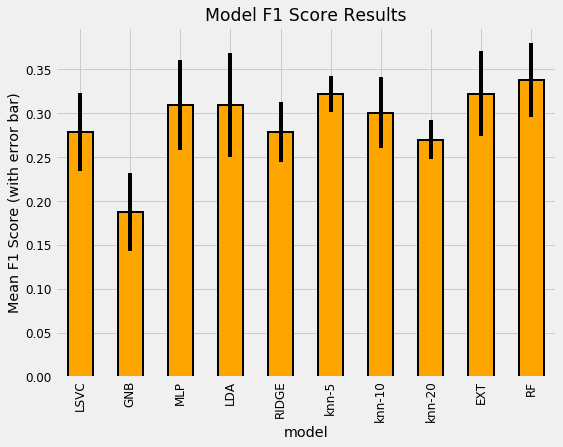

In [188]:
model_results.set_index('model', inplace = True)
model_results['cv_mean'].plot.bar(color = 'orange', figsize = (8, 6),
                                  yerr = list(model_results['cv_std']),
                                  edgecolor = 'k', linewidth = 2)
plt.title('Model F1 Score Results');
plt.ylabel('Mean F1 Score (with error bar)');
model_results.reset_index(inplace = True)

RandomForest가 가장 성능이 좋아보인다. 어떤 hyperparameters도 튜닝하지 않아서 모델간 비교가 완벽하지는 않지만, 이 결과는 캐글에서 많은 사람들이 tree-based ensemble이 성능이 좋다는 것을 말해주기도 한다.

### Making Submission

test_ids라는 변수에 heads of households의 idhogar값을 저장 <br>
(Id는 개개인 고유값이고, idhogar는 한가정의 고유값이므로 하나의 idhogar에 여러 Id값이 있을수있음) <br>

예측할때, 각각의 household만을 예측하고 household id(idhogar) 와 예측한 데이터프레임을 merge할것이다. <br>
이것이 household에 모든사람들이 같은 Target값을 갖게 해줄것이다. <br>
head of household가 없는 test households는 그냥 4로 예측할것이다.

In [207]:
test_ids = list(final.loc[final['Target'].isnull(), 'idhogar'])

In [212]:
def submit(model, train, train_labels, test, test_ids):
    """Train and test a model on the dataset"""
    
    # Train on the data
    model.fit(train, train_labels)
    predictions = model.predict(test)
    predictions = pd.DataFrame({'idhogar': test_ids,
                               'Target': predictions})

     # Make a submission dataframe
    submission = submission_base.merge(predictions, 
                                       on = 'idhogar',
                                       how = 'left').drop(columns = ['idhogar'])
    
    # Fill in households missing a head
    submission['Target'] = submission['Target'].fillna(4).astype(np.int8)    # Target값이 Null이면 4대입

    return submission 

In [215]:
rf_submission = submit(RandomForestClassifier(n_estimators = 100, 
                                              random_state=10, n_jobs = -1), 
                         train_set, train_labels, test_set, test_ids)
rf_submission.to_csv('rf_submission.csv', index = False)

### Feature Selection
여기서는 correlaiont이 0.95보다 큰 컬럼은 제거하겠다. <br>
feature engineering할때 이 변수선택을 하긴했지만 이번에는 Scikit-Learn 의 라이브러리를 사용해서 재귀함수를 적용할것이다.

In [216]:
train_set = pd.DataFrame(train_set, columns = features)

# Create correlation matrix
corr_matrix = train_set.corr()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(abs(upper[column]) > 0.95)]

to_drop

['v18q-count', 'female-sum']

In [217]:
train_set = train_set.drop(columns = to_drop)
train_set.shape

(2973, 186)

In [218]:
test_set = pd.DataFrame(test_set, columns = features)
train_set, test_set = train_set.align(test_set, axis = 1, join = 'inner')
features = list(train_set.columns)

#### Recursive Feature Elimination with Random Forest

In [219]:
from sklearn.feature_selection import RFECV

# Create a model for feature selection
estimator = RandomForestClassifier(random_state = 10, n_estimators = 100,  n_jobs = -1)

# Create the object
selector = RFECV(estimator, step = 1, cv = 3, scoring= scorer, n_jobs = -1)

In [220]:
selector.fit(train_set, train_labels)

RFECV(cv=3,
   estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
            oob_score=False, random_state=10, verbose=0, warm_start=False),
   min_features_to_select=1, n_jobs=-1,
   scoring=make_scorer(f1_score, average=macro), step=1, verbose=0)

96

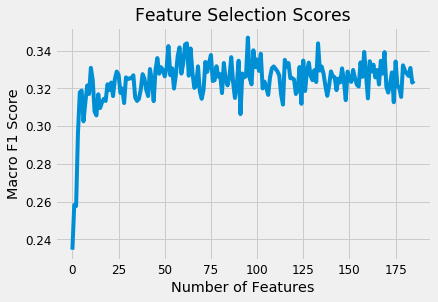

In [221]:
plt.plot(selector.grid_scores_);

plt.xlabel('Number of Features'); plt.ylabel('Macro F1 Score'); plt.title('Feature Selection Scores');
selector.n_features_

In [222]:
rankings = pd.DataFrame({'feature': list(train_set.columns), 'rank': list(selector.ranking_)}).sort_values('rank')
rankings.head(10)

,feature,rank
185,female-head,1
72,tamviv,1
71,v18q1,1
70,r4t2,1
69,r4t1,1
68,r4m3,1
67,r4m2,1
66,r4m1,1
65,r4h3,1
64,r4h2,1


In [223]:
train_selected = selector.transform(train_set)
test_selected = selector.transform(test_set)

In [224]:
# Convert back to dataframe
selected_features = train_set.columns[np.where(selector.ranking_==1)]
train_selected = pd.DataFrame(train_selected, columns = selected_features)
test_selected = pd.DataFrame(test_selected, columns = selected_features)

In [225]:
model_results = cv_model(train_selected, train_labels, model, 'RF-SEL', model_results)

10 Fold CV Score: 0.35333 with std: 0.03952


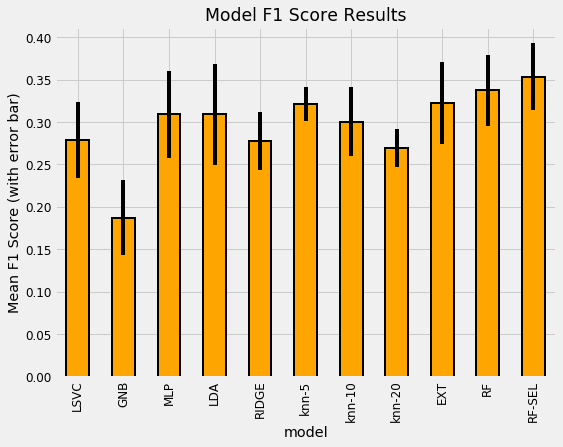

In [226]:
model_results.set_index('model', inplace = True)
model_results['cv_mean'].plot.bar(color = 'orange', figsize = (8, 6),
                                  yerr = list(model_results['cv_std']),
                                 edgecolor = 'k', linewidth = 2)
plt.title('Model F1 Score Results');
plt.ylabel('Mean F1 Score (with error bar)');
model_results.reset_index(inplace = True)